In [8]:
pip show scikit-learn 

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\user\appdata\local\programs\anaconda\envs\ml\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, lightgbm, pingouin, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


# IMPORTATION DES PACKAGES

In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy as sp
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
import warnings
set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# IMPORTATION DE LA BASE

In [3]:
df=pd.read_csv("./train.csv")
df = df.drop(columns='Id')
df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

# VISUALISATION DE LA BASE

In [4]:
df.shape

(1460, 80)

In [5]:
df.describe(include="all")

MSSubClass MSZoning  LotFrontage        LotArea Street Alley  \
count   1460.000000     1460  1201.000000    1460.000000   1460    91   
unique          NaN        5          NaN            NaN      2     2   
top             NaN       RL          NaN            NaN   Pave  Grvl   
freq            NaN     1151          NaN            NaN   1454    50   
mean      56.897260      NaN    70.049958   10516.828082    NaN   NaN   
std       42.300571      NaN    24.284752    9981.264932    NaN   NaN   
min       20.000000      NaN    21.000000    1300.000000    NaN   NaN   
25%       20.000000      NaN    59.000000    7553.500000    NaN   NaN   
50%       50.000000      NaN    69.000000    9478.500000    NaN   NaN   
75%       70.000000      NaN    80.000000   11601.500000    NaN   NaN   
max      190.000000      NaN   313.000000  215245.000000    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         5          6        4   
top          None          NaN        TA        TA      PConc       TA   
freq          864          NaN       906      128

# DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## VARIABLES CATEGORIELLES

In [7]:
df = df.astype({"MSSubClass": 'category',
                    "OverallQual": 'category',"OverallCond": 'category',"YearBuilt": 'category',
                    "YearRemodAdd":'category',"YrSold":'category',"MoSold":'category',"GarageYrBlt":'category'})


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [9]:
df.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df[df.select_dtypes(include="object").columns]=df[df.select_dtypes(include="object").columns].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [14]:
df.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000   1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  180921.195890  
std      55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000      0.000000  214000.000000  
max     480.000000   738.000000  15500.000000  755000.000000

In [15]:
df.describe(include="category")

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         1460     1460   1460    91     1460        1460      1460   
unique          15        5      2     2        4           4         2   
top             20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq           536     1151   1454    50      925        1311      1459   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1460      1460         1460       1460       1460     1460   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1052      1382          225       1260       1445     1220   

       HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
count        1460         1460         1460       1460          1460   
unique          8           10            9        112            61   
top        1Story            5            5       2006          1950   
freq          726          397          821         67           178   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual  \
count        1460         770       1379       1379.0         1379       1379   
unique          7           5          6         97.0            3          5   
top           Typ          Gd     Attchd       2005.0          Unf         TA   
freq         1360         380        870         65.0          605       1311   

       GarageCond PavedDrive PoolQC  Fence MiscFeature  MoSold  YrSold  \
count        1379       1460      7    281          54    1460    1460   
unique          5          3      3      4           4      12       5   
top            TA          Y     Gd  MnPrv        Shed       6    2009   
freq         1326       1340      3    157          49     253     338   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198

## VARIABLES ORDINALES

In [17]:
warnings.filterwarnings('ignore')
labels={'Alley':'No alley access',
        'BsmtQual':'No Basement',
        'BsmtCond':'No Basement',
        'BsmtExposure':'No Basement',
        'BsmtFinType1':'No Basement',
        'BsmtFinType2':'No Basement',
        'FireplaceQu':'No Fireplace',
        'GarageType':'No Garage',
        'GarageYrBlt':'No Garage',
        'GarageFinish':'No Garage',
        'GarageQual':'No Garage',
        'GarageCond':'No Garage','PoolQC':'No Pool',
        'Fence':'No Fence',
        'MiscFeature':'None'}

for variable,label in labels.items():
    # Set a new category to the variable
    df[variable].cat.add_categories(label,inplace=True)
    
    #Replace all the NA's by the new category
    df[variable].where(df[variable].notna(),other=label,inplace=True)

In [18]:
labels={'LandContour':['Lvl','Bnk','HLS','Low'],
        'Utilities':['ELO','NoSeWa','NoSeWr','AllPub'],
        'LandSlope':['Gtl','Mod','Sev'],
        'LotShape':['Reg','IR1','IR2','IR3'],
        'HouseStyle':['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],
        'OverallQual':[1,2,3,4,5,6,7,8,9,10],'OverallCond':[1,2,3,4,5,6,7,8,9,10],
        'ExterQual':['Po','Fa','TA','Gd','Ex'],
        'ExterCond':['Po','Fa','TA','Gd','Ex'],
        'BsmtQual':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtCond':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtExposure':['No Basement','No','Mn','Av','Gd'],
        'BsmtFinType1':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'BsmtFinType2':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'HeatingQC':['Po','Fa','TA','Gd','Ex'],
        'KitchenQual':['Po','Fa','TA','Gd','Ex'],
        'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
        'FireplaceQu':['No Fireplace','Po','Fa','TA','Gd','Ex'],
        'GarageQual':['No Garage','Po','Fa','TA','Gd','Ex'],
        'GarageFinish':['No Garage','Unf','RFn','Fin'],
        'GarageCond':['No Garage','Po','Fa','TA','Gd','Ex'],
        'PavedDrive':['N','P','Y'],
        'PoolQC':['No Pool','Po','Fa','TA','Gd','Ex'],
        'Fence':['No Fence','MnWw','GdWo','MnPrv','GdPrv']
       }
for var_name,label in labels.items():
    for value in label:
        df[var_name] = df[var_name].astype('category')
        if value not in df[var_name].cat.categories:
            df[var_name].cat.add_categories(value,inplace=True)  
    df[var_name].cat.reorder_categories(label,inplace=True)
    df[var_name].cat.as_ordered(inplace=True)

## Controle des doublons

In [19]:
df.duplicated().sum()

0

## DONNEES MANQUANTES

<AxesSubplot:>

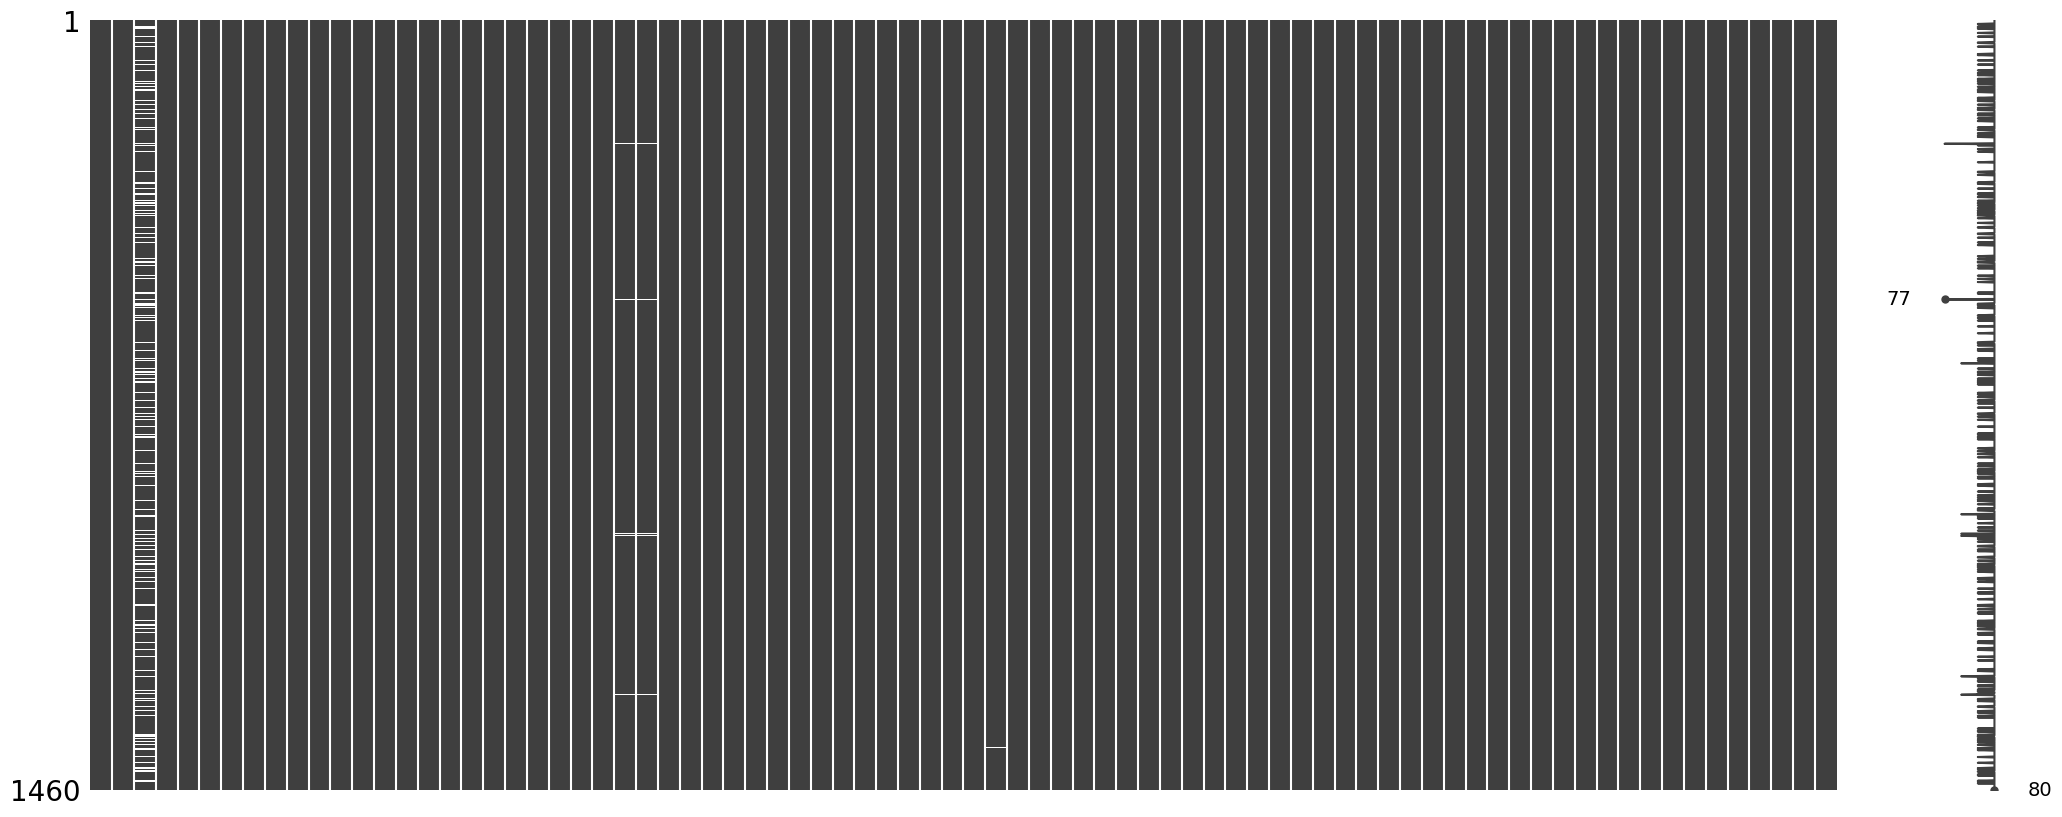

In [20]:
import missingno as msno
msno.matrix(df)

In [22]:
ncol = df.shape[0]
val = df.isna().sum()/ncol*100
val = val.sort_values(ascending=False).round(2)
val

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
KitchenAbvGr     0.00
                ...  
ExterCond        0.00
ExterQual        0.00
Exterior2nd      0.00
Exterior1st      0.00
SalePrice        0.00
Length: 80, dtype: float64

In [23]:
result = df.loc[df['LotFrontage'].isna()]
print(result)

     MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
7            60       RL          NaN    10382   Pave  No alley access   
12           20       RL          NaN    12968   Pave  No alley access   
14           20       RL          NaN    10920   Pave  No alley access   
16           20       RL          NaN    11241   Pave  No alley access   
24           20       RL          NaN     8246   Pave  No alley access   
...         ...      ...          ...      ...    ...              ...   
1429         20       RL          NaN    12546   Pave  No alley access   
1431        120       RL          NaN     4928   Pave  No alley access   
1441        120       RM          NaN     4426   Pave  No alley access   
1443         30       RL          NaN     8854   Pave  No alley access   
1446         20       RL          NaN    26142   Pave  No alley access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
7         IR1         Lvl    AllPub    

## VALEURS ABERRANTES

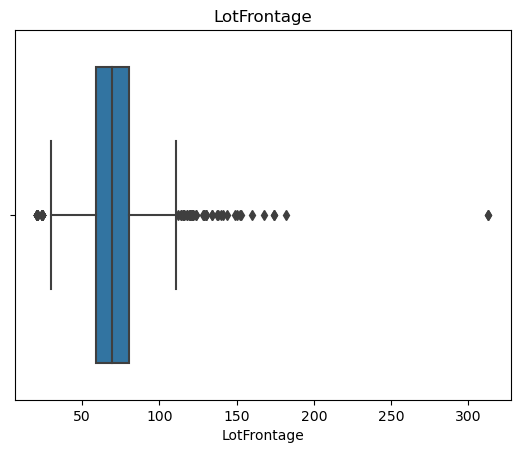

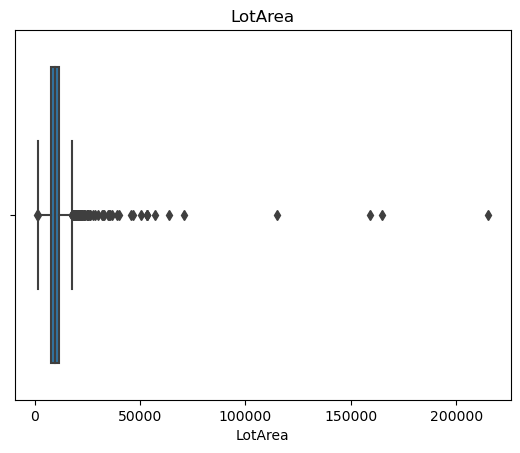

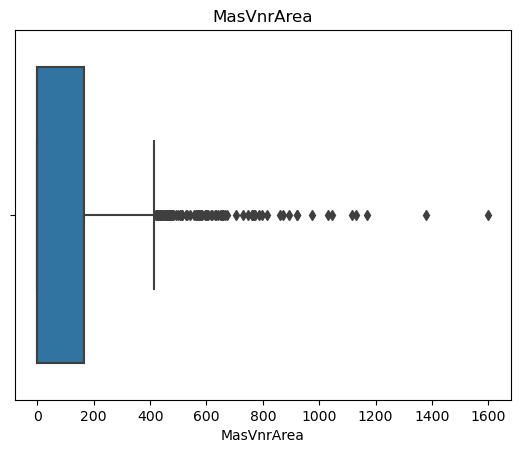

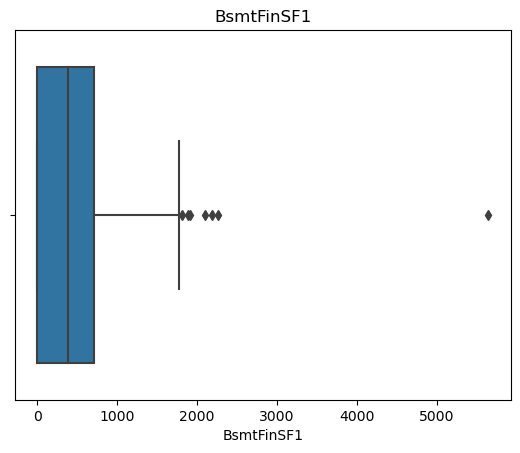

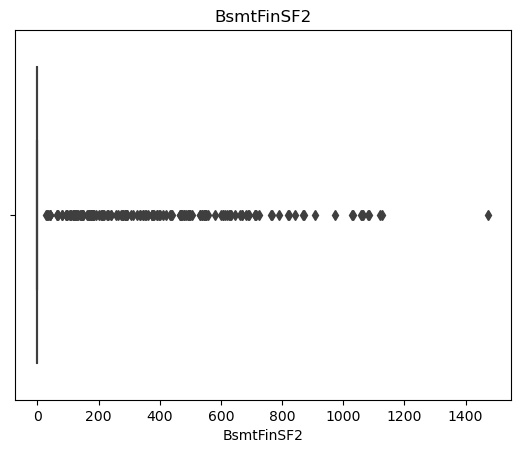

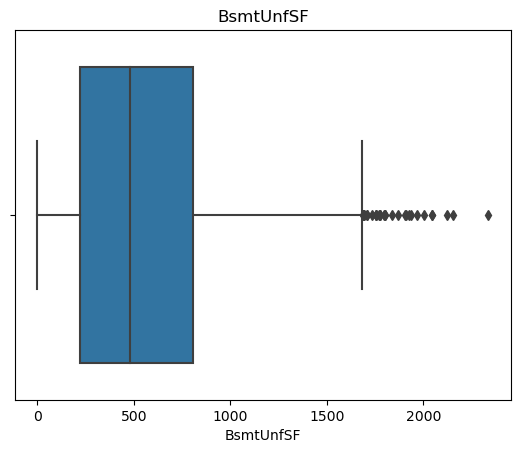

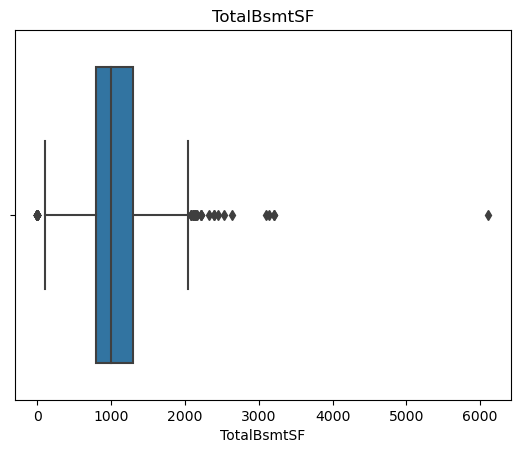

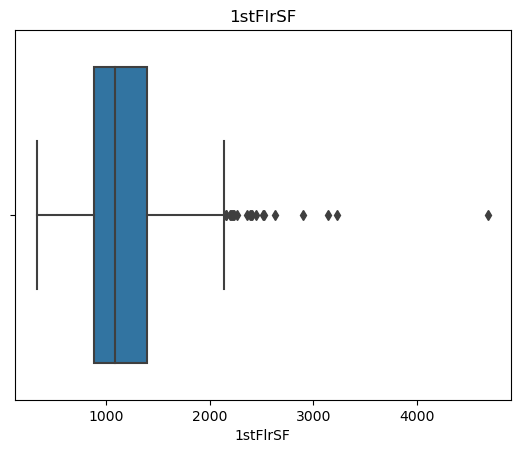

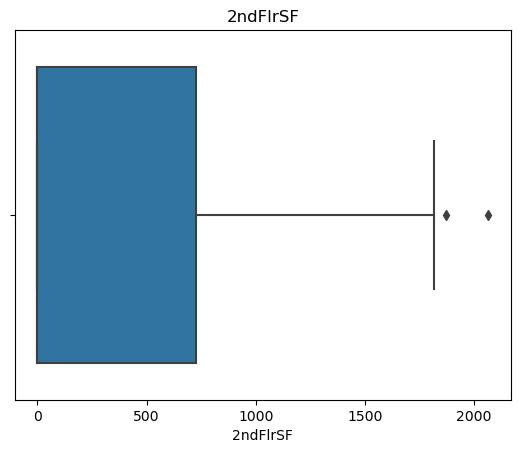

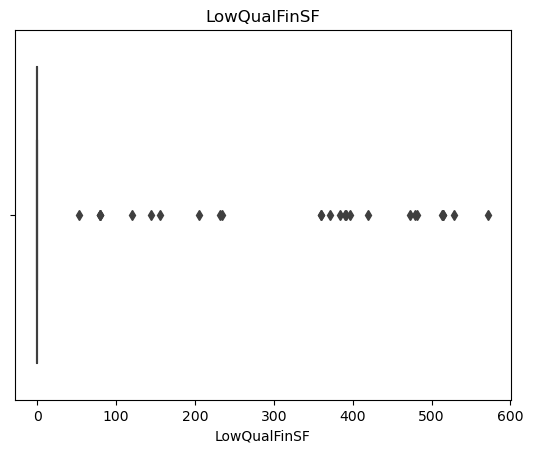

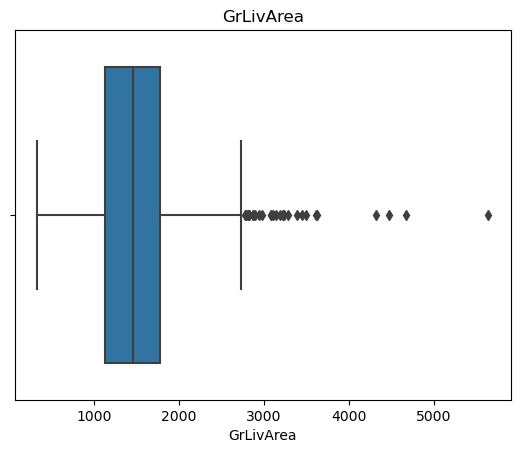

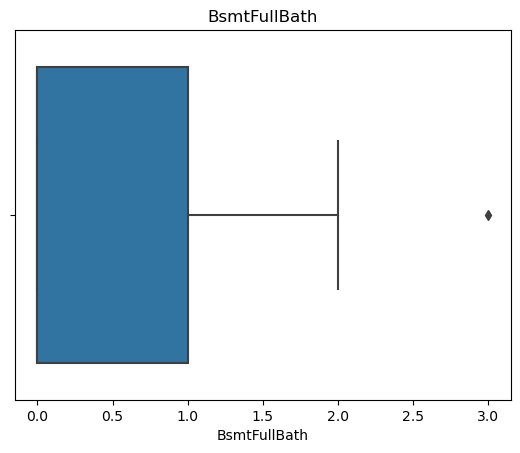

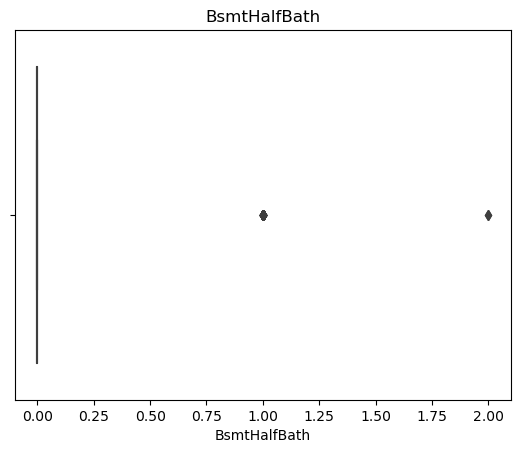

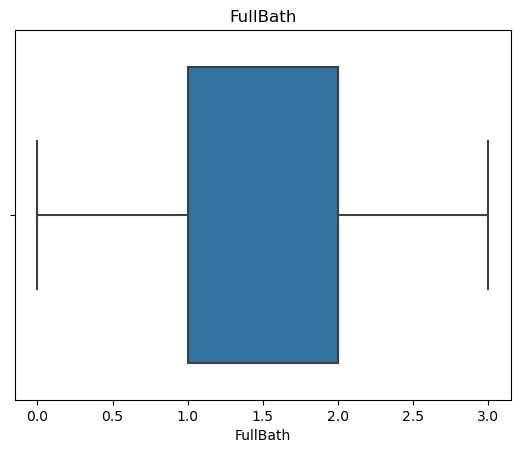

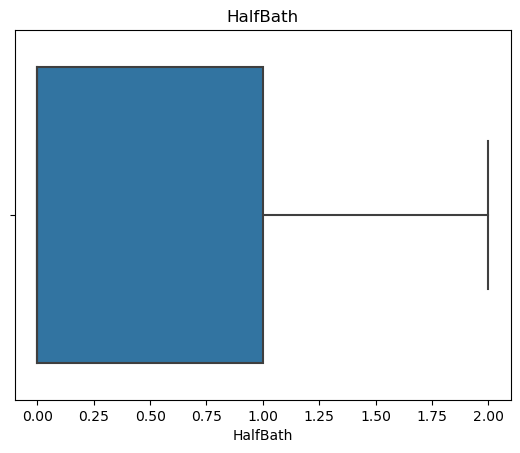

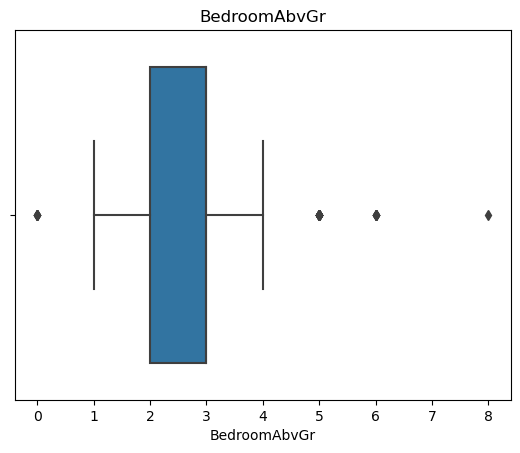

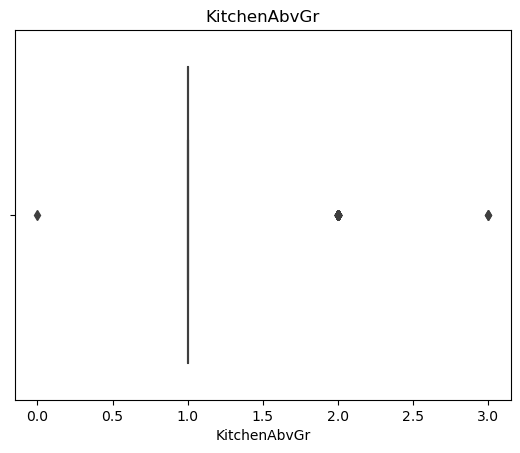

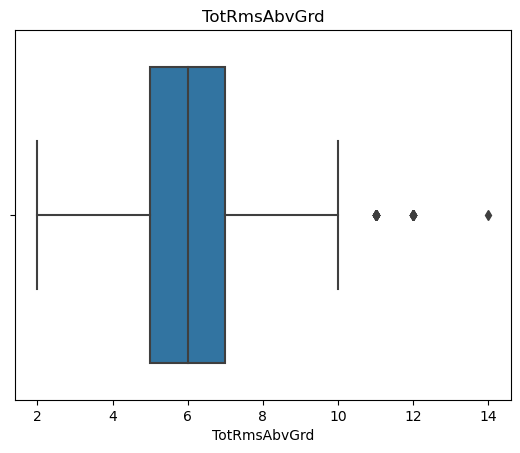

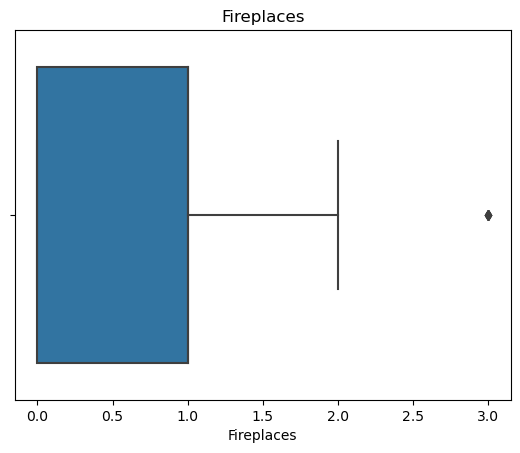

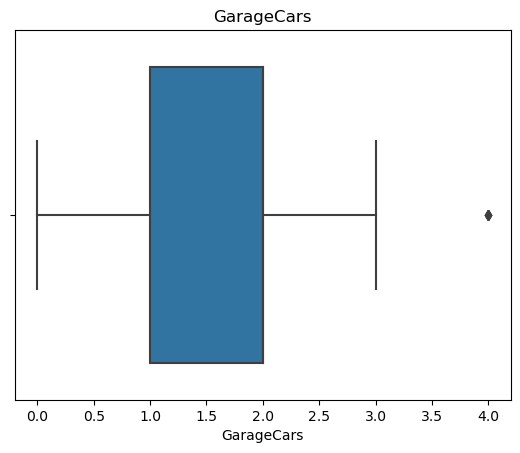

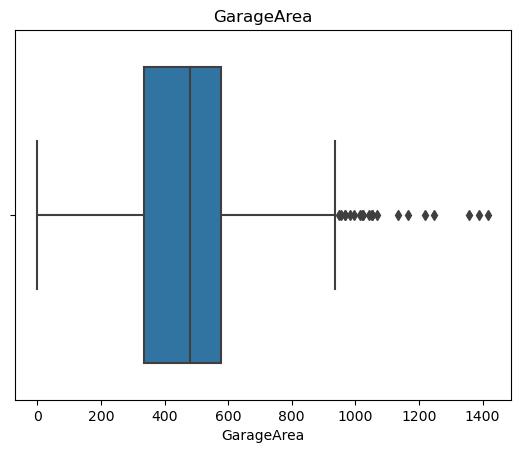

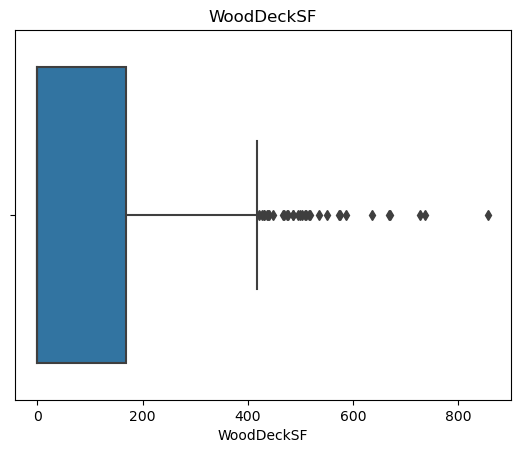

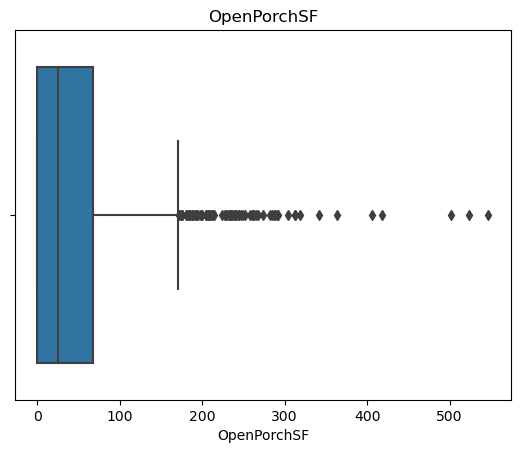

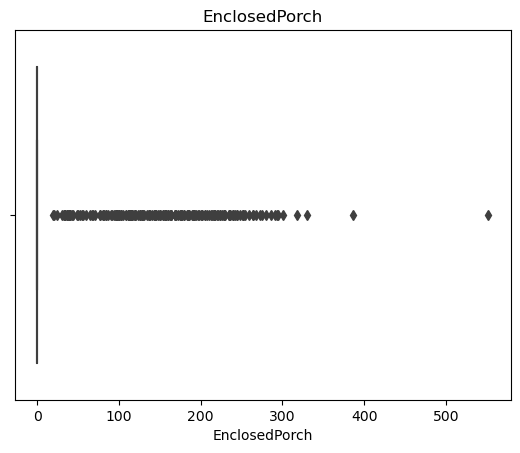

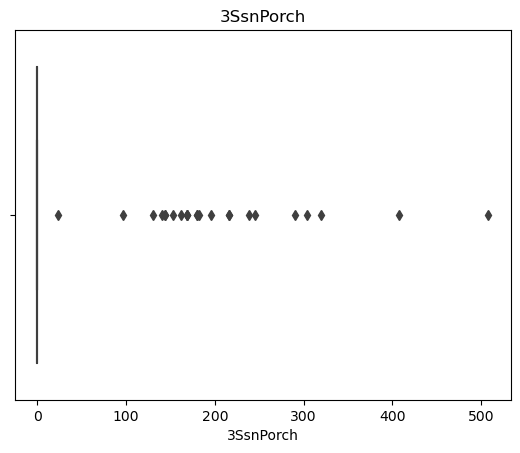

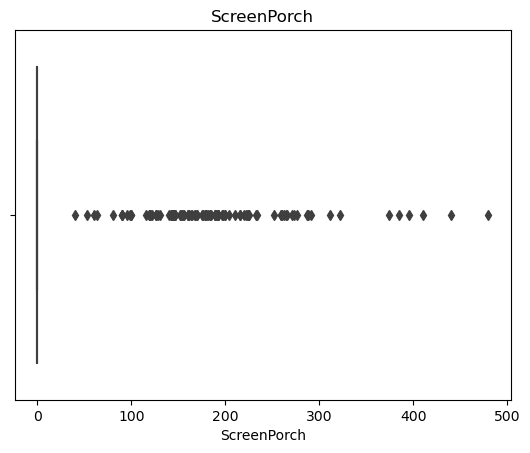

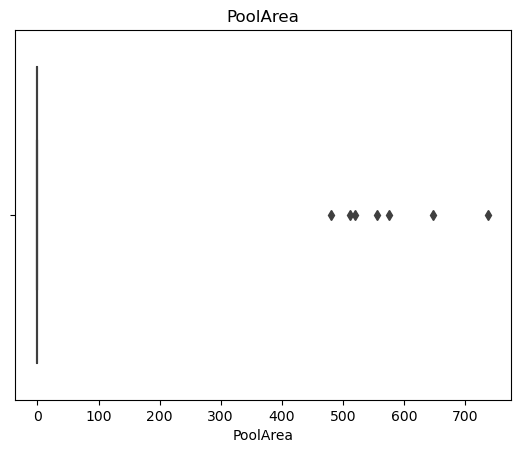

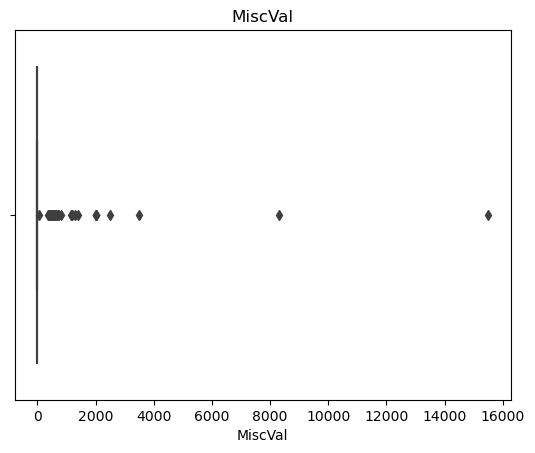

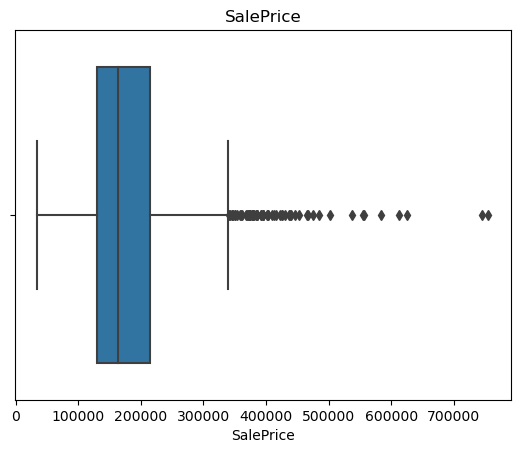

In [24]:
numerical_features = df.select_dtypes(include="number").columns
for i, column in enumerate(numerical_features):
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

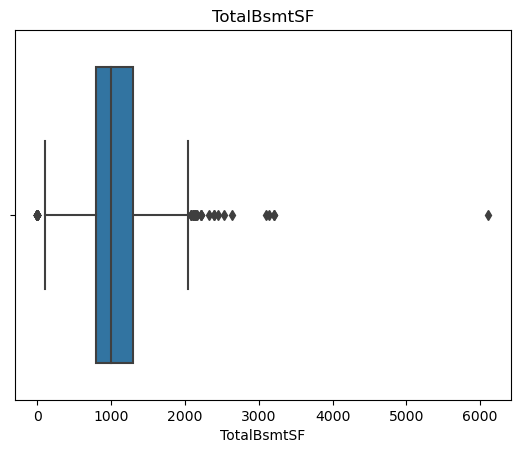

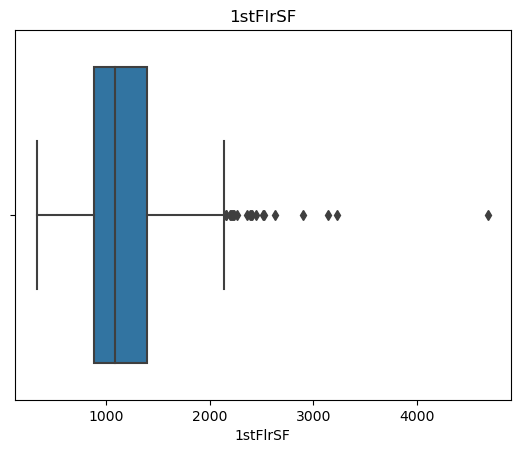

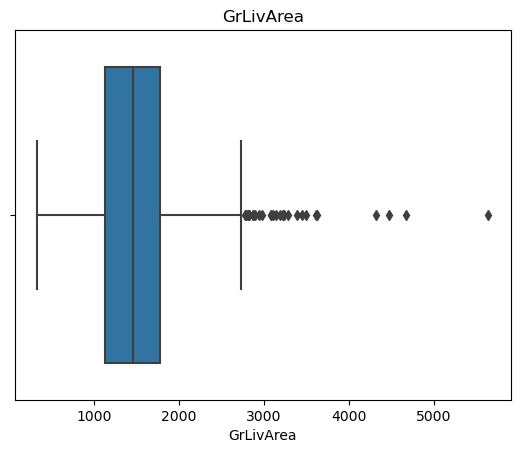

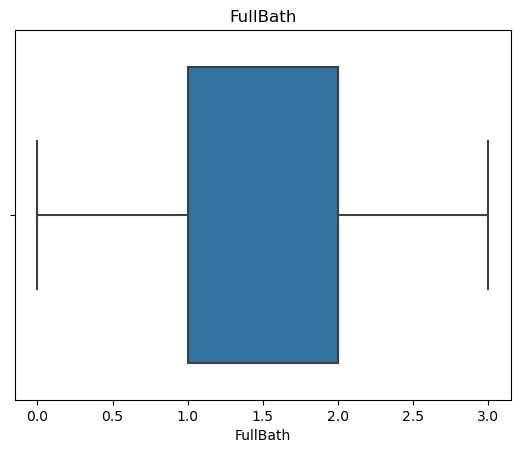

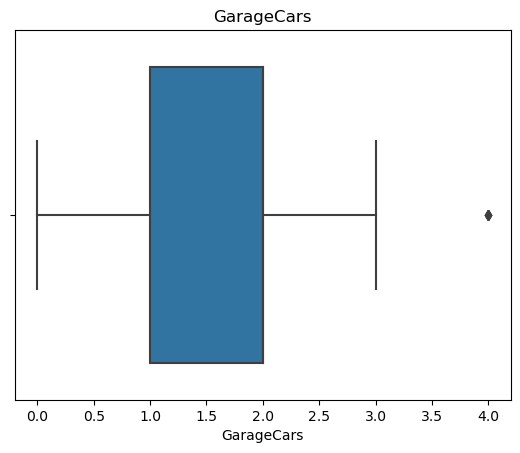

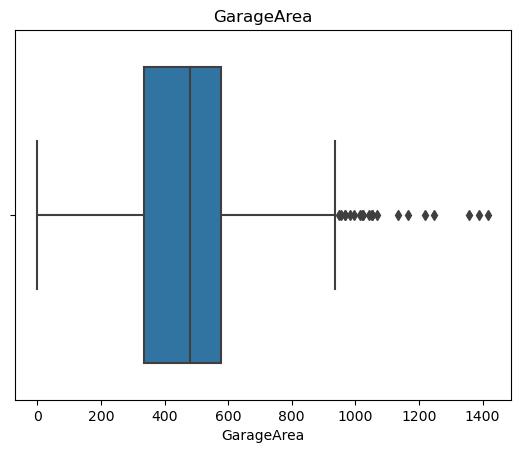

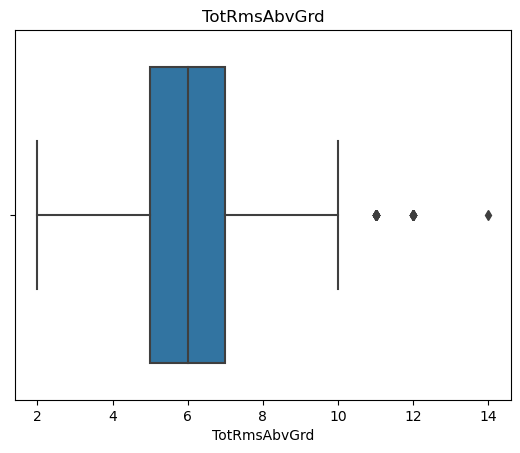

In [26]:
important_features = df.loc[:, ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath','GarageCars','GarageArea','TotRmsAbvGrd']].columns
for i, column in enumerate(important_features):
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [28]:
df['SalePrice'].describe()
important_features = df.loc[:, ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath','GarageCars','GarageArea','TotRmsAbvGrd']].columns
for i, column in enumerate(important_features):
    vue = df.loc[:, [column,'SalePrice']]
    vue =  vue.sort_values(by=column, ascending=False)
    print(vue.head(20))

      TotalBsmtSF  SalePrice
1298         6110     160000
332          3206     284000
496          3200     430000
523          3138     184750
440          3094     555000
1373         2633     466500
1044         2524     278000
691          2444     755000
1182         2396     745000
224          2392     386250
898          2330     611657
70           2223     244000
888          2217     268000
178          2216     501837
1205         2158     271900
477          2153     380000
313          2136     375000
1223         2136     137900
278          2121     415298
1250         2110     244000
      1stFlrSF  SalePrice
1298      4692     160000
496       3228     430000
523       3138     184750
1024      2898     287000
1373      2633     466500
1044      2524     278000
529       2515     200624
691       2444     755000
1182      2411     745000
440       2402     555000
224       2392     386250
898       2364     611657
113       2259     217000
178       2234     501837
7

# CREATIONS DE VARIABLES

In [29]:
df.loc[:, 'PartBsmtUnfSF'] = df['BsmtUnfSF']/df['TotalBsmtSF']*100
df.loc[:, ['PartBsmtUnfSF','BsmtUnfSF','TotalBsmtSF']] 

PartBsmtUnfSF  BsmtUnfSF  TotalBsmtSF
0         17.523364        150          856
1         22.503962        284         1262
2         47.173913        434          920
3         71.428571        540          756
4         42.794760        490         1145
...             ...        ...          ...
1455     100.000000        953          953
1456      38.197147        589         1542
1457      76.128472        877         1152
1458       0.000000          0         1078
1459      10.828025        136         1256

[1460 rows x 3 columns]

In [30]:
YrSold = df['YrSold'].astype(int)
YrBuilt= df['YearBuilt'].astype(int)
df.loc[:, 'Age'] =  YrSold - YrBuilt

In [31]:
GarageYrBlt= pd.to_numeric(df['GarageYrBlt'], errors='coerce')
df.loc[:, 'Age_GarageYrBlt'] =  YrSold - GarageYrBlt
df['Age_GarageYrBlt']

0        5.0
1       31.0
2        7.0
3        8.0
4        8.0
        ... 
1455     8.0
1456    32.0
1457    69.0
1458    60.0
1459    43.0
Name: Age_GarageYrBlt, Length: 1460, dtype: float64

In [32]:
X = df.drop(['SalePrice','BsmtUnfSF','YrSold','YearBuilt', 'YearRemodAdd','GarageYrBlt'], axis=1)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MSSubClass       1460 non-null   category
 1   MSZoning         1460 non-null   category
 2   LotFrontage      1201 non-null   float64 
 3   LotArea          1460 non-null   int64   
 4   Street           1460 non-null   category
 5   Alley            1460 non-null   category
 6   LotShape         1460 non-null   category
 7   LandContour      1460 non-null   category
 8   Utilities        1460 non-null   category
 9   LotConfig        1460 non-null   category
 10  LandSlope        1460 non-null   category
 11  Neighborhood     1460 non-null   category
 12  Condition1       1460 non-null   category
 13  Condition2       1460 non-null   category
 14  BldgType         1460 non-null   category
 15  HouseStyle       1460 non-null   category
 16  OverallQual      1460 non-null   category


In [34]:
Y = df["SalePrice"]
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
categorical_features = X.select_dtypes(include="category").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

Numerical features:
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',


In [36]:
X_num = X.select_dtypes(include="number")
X_cat = X.select_dtypes(include="category")

## DATA SUMMARY

In [37]:
Y.describe().astype(int)

count      1460
mean     180921
std       79442
min       34900
25%      129975
50%      163000
75%      214000
max      755000
Name: SalePrice, dtype: int32

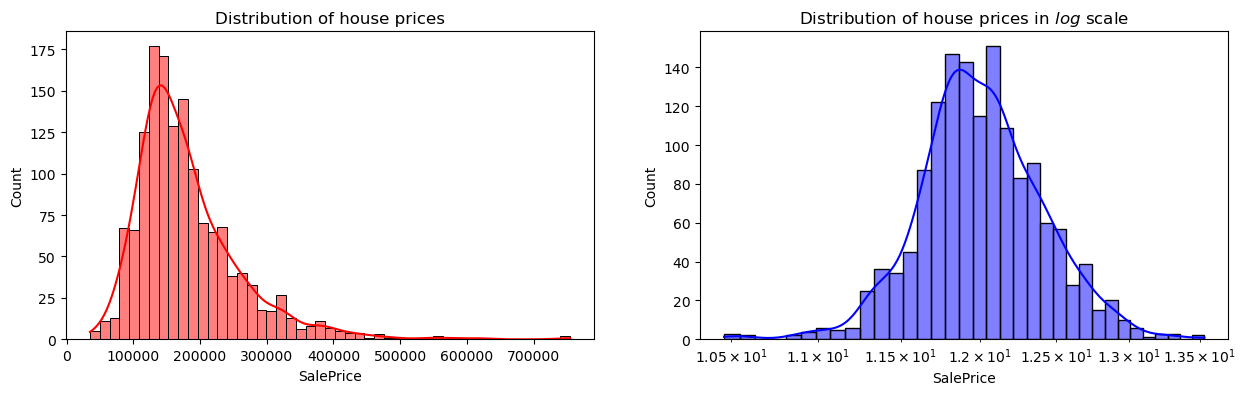

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(Y, color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

log_Y = np.log(Y)
sns.histplot(log_Y, color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

In [39]:
categorical_features = X.select_dtypes(include="category").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

Numerical features:
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',


In [40]:
X.describe(include="all")

MSSubClass MSZoning  LotFrontage        LotArea Street  \
count       1460.0     1460  1201.000000    1460.000000   1460   
unique        15.0        5          NaN            NaN      2   
top           20.0       RL          NaN            NaN   Pave   
freq         536.0     1151          NaN            NaN   1454   
mean           NaN      NaN    70.049958   10516.828082    NaN   
std            NaN      NaN    24.284752    9981.264932    NaN   
min            NaN      NaN    21.000000    1300.000000    NaN   
25%            NaN      NaN    59.000000    7553.500000    NaN   
50%            NaN      NaN    69.000000    9478.500000    NaN   
75%            NaN      NaN    80.000000   11601.500000    NaN   
max            NaN      NaN   313.000000  215245.000000    NaN   

                  Alley LotShape LandContour Utilities LotConfig LandSlope  \
count              1460     1460        1460      1460      1460      1460   
unique                3        4           4         2         5         3   
top     No alley access      Reg         Lvl    AllPub    Inside       Gtl   
freq               1369      925        1311      1459      1052      1382   
mean                NaN      NaN         NaN       NaN       NaN       NaN   
std                 NaN      NaN         NaN       NaN       NaN       NaN   
min                 NaN      NaN         NaN       NaN       NaN       NaN   
25%                 NaN      NaN         NaN       NaN       NaN       NaN   
50%                 NaN      NaN         NaN       NaN       NaN       NaN   
75%                 NaN      NaN         NaN       NaN       NaN       NaN   
max                 NaN      NaN         NaN       NaN       NaN       NaN   

       Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
count          1460       1460       1460     1460       1460       1460.0   
unique           25          9          8        5          8         10.0   
top           NAmes       Norm       Norm     1Fam     1Story          5.0   
freq            225       1260       1445     1220        726        397.0   
mean            NaN        NaN        NaN      NaN        NaN          NaN   
std             NaN        NaN        NaN      NaN        NaN          NaN   
min             NaN        NaN        NaN      NaN        NaN          NaN   
25%             NaN        NaN        NaN      NaN        NaN          NaN   
50%             NaN        NaN        NaN      NaN        NaN          NaN   
75%             NaN        NaN        NaN      NaN        NaN          NaN   
max             NaN        NaN        NaN      NaN        NaN          NaN   

        OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
count        1460.0      1460     1460        1460        1460       1452   
unique          9.0         6        8          15          16          4   
top             5.0     Gable  CompShg     VinylSd     VinylSd       None   
freq          821.0      1141     1434         515         504        864   
mean            NaN       NaN      NaN         NaN         NaN        NaN   
std             NaN       NaN      NaN         NaN         NaN        NaN   
min             NaN       NaN      NaN         NaN         NaN        NaN   
25%             NaN       NaN      NaN         NaN         NaN        NaN   
50%             NaN       NaN      NaN         NaN         NaN        NaN   
75%             NaN       NaN      NaN         NaN         NaN        NaN   
max             NaN       NaN      NaN         NaN         NaN        NaN   

         MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
count   1452.000000      1460      1460       1460     1460     1460   
unique          NaN         4         5          6        5        5   
top             NaN        TA        TA      PConc       TA       TA   
freq            NaN       906      1282        647      649     1311   
mean     103.685262       NaN       NaN        NaN      

IndexError: index 46 is out of bounds for axis 0 with size 46

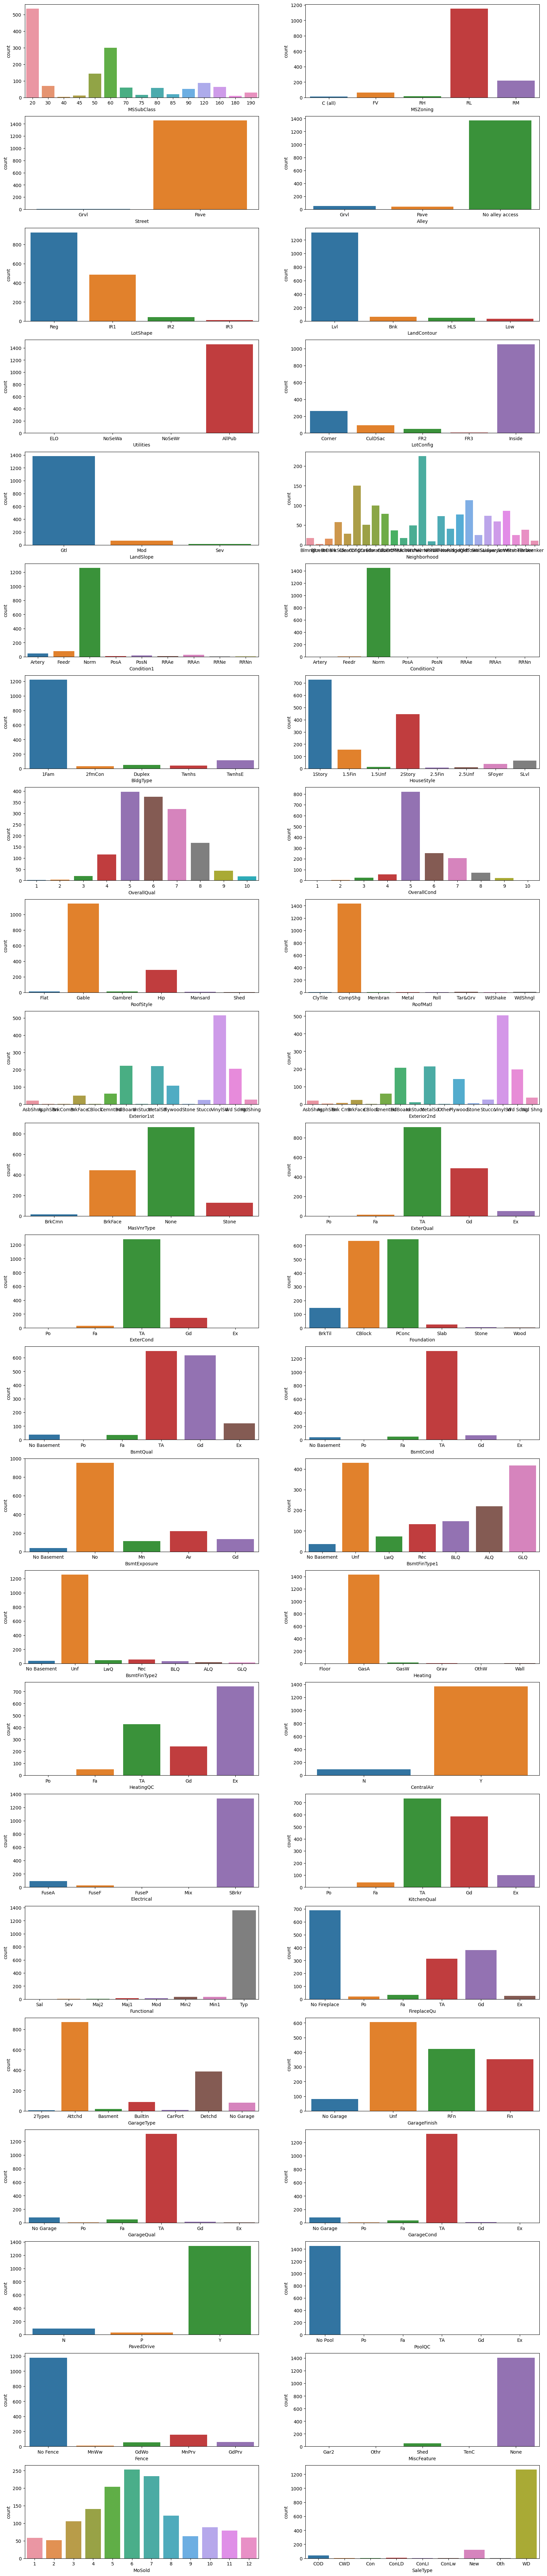

In [41]:
ncols=2
nrows=len(categorical_features)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,100))
axes=axes.ravel()

for i, col_name in enumerate(categorical_features):
        ax=axes[i]
        sns.countplot(data=X,x=col_name,ax=ax)

## FEATURE SELECTION

### VARIABLES QUALITATIVES

IndexError: index 46 is out of bounds for axis 0 with size 46

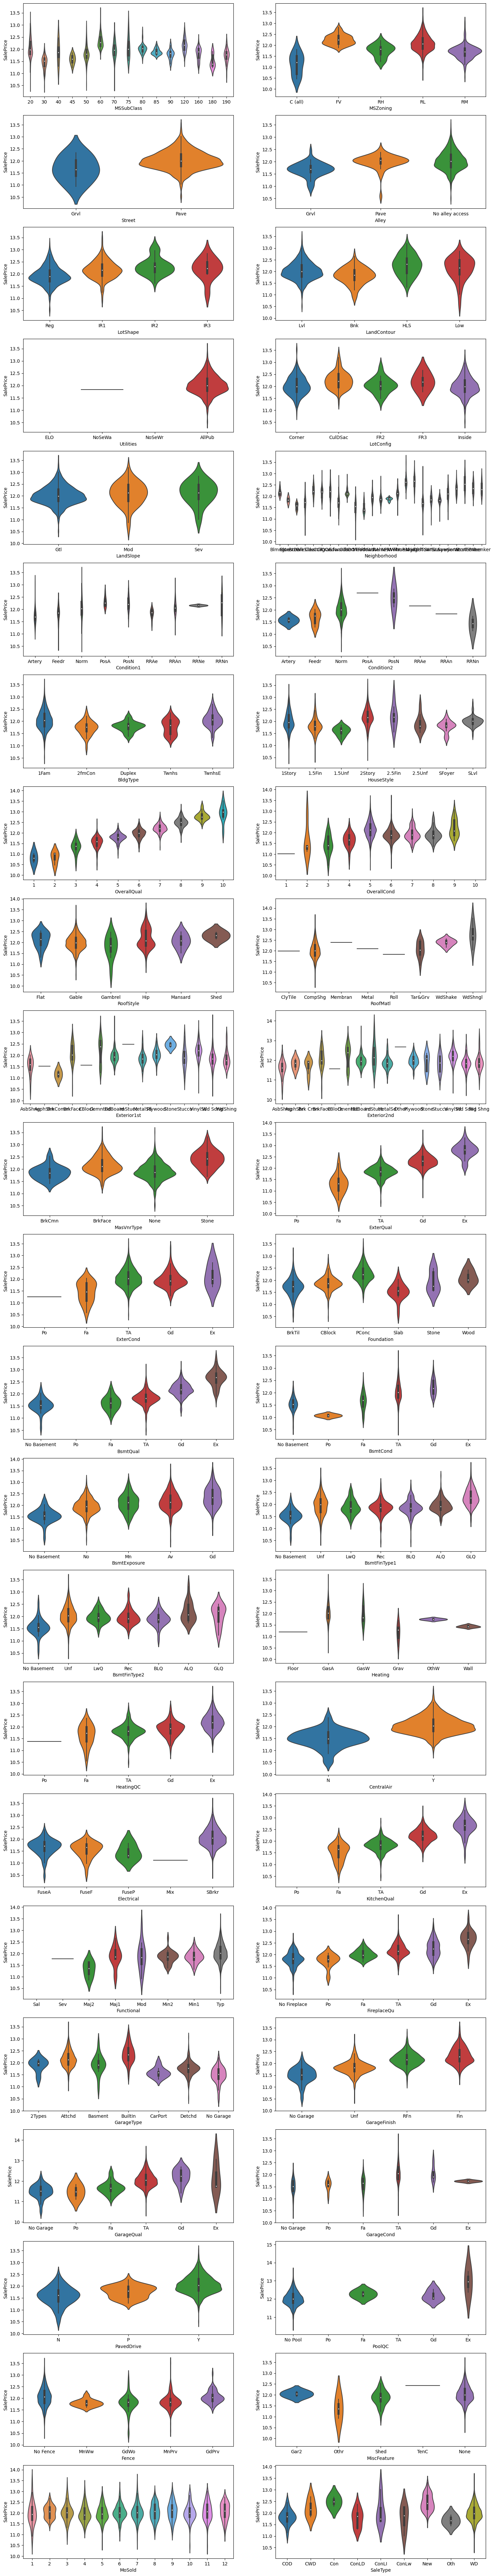

In [42]:
warnings.filterwarnings("ignore")
fig, axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,100))
axes=axes.ravel()

for i, col_name in enumerate(categorical_features):
    ax=axes[i]
    sns.violinplot(x=col_name,y=log_Y,data=df,ax=ax)

#### COMMENTAIRE GRAPHIQUE

Les graphes ci-dessus permettent de voir les variables liées à celle d'intérêt. On peut deja relever que le prix varie en fonction des modalités de la plupart des variables. Toutefois, la différence semble moins significative pour certaines variables (MSSubclass : Identifies the type of dwelling involved in the sale ; Lotshape, LotConfig : Lot configuration ; Landshope :  Slope of property, Mosold : Month sold). L'analyse de la variance va nous permettre de confirmer nos hypothèses quant à l'influence des variables. 

In [43]:
## CHI2
import itertools
from scipy.stats import chi2_contingency
from  pandas.plotting import scatter_matrix

XX= X.select_dtypes(include='category')
test_chi2 = pd.DataFrame(np.nan, index=[0], columns=['testv1','testv2','chi2','p-value'])
# Get the chi-squared test for all pairs of variables in the DataFrame
for var1, var2 in itertools.combinations(XX.columns, 2):
    ct = pd.crosstab(index=XX[var1], columns=XX[var2])
    chi2, p, dof, expected = chi2_contingency(ct)
    new_observation = {'testv1' : var1,'testv2': var2, 'chi2': chi2, 'p-value': p}
    test_chi2  = test_chi2.append(new_observation, ignore_index=True)
test_chi2 = test_chi2.sort_values(by='chi2',ascending = False)

In [44]:
test_chi2
test_chi2[test_chi2['chi2'] > 1000]

testv1         testv2          chi2        p-value
676    Exterior1st    Exterior2nd  11868.678367   0.000000e+00
13      MSSubClass     HouseStyle   7411.613589   0.000000e+00
12      MSSubClass       BldgType   4683.575446   0.000000e+00
1046    GarageQual     GarageCond   3633.062233   0.000000e+00
9       MSSubClass   Neighborhood   3163.901347   0.000000e+00
388   Neighborhood    Exterior2nd   2543.991276   0.000000e+00
54        MSZoning   Neighborhood   2486.263988   0.000000e+00
1027    GarageType   GarageFinish   2068.542276   0.000000e+00
387   Neighborhood    Exterior1st   2020.339424  8.393905e-238
831       BsmtQual   BsmtFinType1   1960.385538   0.000000e+00
892   BsmtFinType1   BsmtFinType2   1775.454707   0.000000e+00
560    OverallQual      ExterQual   1676.242851   0.000000e+00
806     Foundation       BsmtQual   1664.494315   0.000000e+00
1081      SaleType  SaleCondition   1652.675077   0.000000e+00
829       BsmtQual       BsmtCond   1631.972427   0.000000e+00
872   BsmtExposure   BsmtFinType1   1608.371251   0.000000e+00
830       BsmtQual   BsmtExposure   1596.109905   0.000000e+00
1029    GarageType     GarageCond   1567.202205  1.866837e-311
1028    GarageType     GarageQual   1563.533690  1.131055e-310
383   Neighborhood    OverallQual   1561.815525  2.185057e-202
617      RoofStyle       RoofMatl   1561.216548  6.136147e-306
809     Foundation   BsmtFinType1   1532.614114  4.428960e-304
1037  GarageFinish     GarageQual   1531.020300   0.000000e+00
852       BsmtCond   BsmtFinType1   1520.875825  6.964277e-307
1038  GarageFinish     GarageCond   1517.904034   0.000000e+00
832       BsmtQual   BsmtFinType2   1480.107889  3.680372e-298
853       BsmtCond   BsmtFinType2   1447.858669  2.908220e-291
851       BsmtCond   BsmtExposure   1443.183615  8.443026e-298
873   BsmtExposure   BsmtFinType2   1425.793158  1.519951e-286
392   Neighborhood     Foundation   1386.734924  2.441838e-214
393   Neighborhood       BsmtQual   1358.482524  5.405322e-222
554    OverallQual    OverallCond   1322.058528  4.322320e-229
768      ExterQual    KitchenQual   1312.251315  6.988390e-277
572    OverallQual    KitchenQual   1303.056556  9.869522e-258
563    OverallQual       BsmtQual   1261.969859  1.066162e-241
381   Neighborhood       BldgType   1117.321094  1.312756e-173
390   Neighborhood      ExterQual   1101.235380  6.512742e-184
382   Neighborhood     HouseStyle   1047.260852  5.596558e-127
19      MSSubClass    Exterior2nd   1044.281456  9.342926e-111
36      MSSubClass     GarageType   1041.582516  5.218516e-165
595    OverallCond       BsmtCond   1035.314539  6.182784e-197
807     Foundation       BsmtCond   1034.423419  1.772839e-206
810     Foundation   BsmtFinType2   1023.282877  6.224191e-196
23      MSSubClass     Foundation   1010.142847  1.331368e-166

In [45]:
## ANOVA
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

XX= X.select_dtypes(include='category')
anova = pd.DataFrame(np.nan, index=[0], columns=['var','F','p-value'])
for group in XX.columns :
    # Perform ANOVA
    groupe = base[group]
    model = ols('Y ~ groupe', base).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    p_value = aov_table['PR(>F)'][0]
    new_observation = {'var' : group ,'F': aov_table['F'][0], 'p-value': aov_table['PR(>F)'][0]}
    anova = anova.append(new_observation, ignore_index=True)
anova.sort_values(by = 'F',ascending = False)

NameError: name 'base' is not defined

#### COMMENTAIRE ANOVA
On peut déjà voir les variables qui sont plus liées à la variable d'intérêt : ExterQual, Utilities, KitchenQual, Functional, Overallqual. De plus, le mois de vente et la pente du terrain n'influe pas vraiment sur le prix.

### VARIABLES QUANTITATIVES

In [ ]:
## CORRELATIONS
## pair plot
base_num= df.select_dtypes(include='number')
sns.pairplot(base_num, corner=True, diag_kind="kde");

In [ ]:
# correlation plot
XXX= X.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
corr = XXX.assign(target=Y).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Greens', square=True, mask=mask, cbar=True, vmin=None, vmax=None);

In [ ]:
corr = corr.sort_values(by = 'target', ascending = False)
corr.loc[:,'variable'] = corr.index.values
corr.loc[:,['target','variable']]

### COMMENTAIRES
A partir du corrplot, nous pouvons aussi identifier les variables quantitatives les plus liées à notre cible. Il s'agit de TotalBsmtSF, 1sFlrSf, GrlivArea, Fullbath,GarageCars,GarageArea et TotRmsAbvGr. Il sagit surtout de surfaces, du nombre de toilettes, de garages et de chambres.

In [209]:
df[df.select_dtypes(include="object").columns]=df[df.select_dtypes(include="object").columns].astype('category')

In [275]:
labels={'LandContour':['Lvl','Bnk','HLS','Low'],
        'Utilities':['ELO','NoSeWa','NoSeWr','AllPub'],
        'LandSlope':['Gtl','Mod','Sev'],
        'LotShape':['Reg','IR1','IR2','IR3'],
        'HouseStyle':['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],
        'OverallQual':['1','2','3','4','5','6','7','8','9','10'],'OverallCond':['1','2','3','4','5','6','7','8','9','10'],
        'ExterQual':['Po','Fa','TA','Gd','Ex'],
        'ExterCond':['Po','Fa','TA','Gd','Ex'],
        'BsmtQual':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtCond':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtExposure':['No Basement','No','Mn','Av','Gd'],
        'BsmtFinType1':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'BsmtFinType2':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'HeatingQC':['Po','Fa','TA','Gd','Ex'],
        'KitchenQual':['Po','Fa','TA','Gd','Ex'],
        'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
        'FireplaceQu':['No Fireplace','Po','Fa','TA','Gd','Ex'],
        'GarageQual':['No Garage','Po','Fa','TA','Gd','Ex'],
        'GarageFinish':['No Garage','Unf','RFn','Fin'],
        'GarageCond':['No Garage','Po','Fa','TA','Gd','Ex'],
        'PavedDrive':['N','P','Y'],
        'PoolQC':['No Pool','Po','Fa','TA','Gd','Ex'],
        'Fence':['No Fence','MnWw','GdWo','MnPrv','GdPrv']
       }


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\710342346.py:31: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[var_name].cat.reorder_categories(label,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20952\710342346.py:31: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[var_name].cat.reorder_categories(label,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20952\710342346.py:31: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[var_name].cat.reorder_categories(label,inplace=True)
C:\Users\USER\AppData\

In [14]:
labels_or=['LandContour', 'Utilities', 'LandSlope', 'LotShape', 'HouseStyle', 'OverallQual','OverallCond','ExterQual',
            'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
            'KitchenQual','Functional','FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageCond', 'PavedDrive',
             'PoolQC','Fence']

## Selection  des variables qualitatives

<AxesSubplot:>

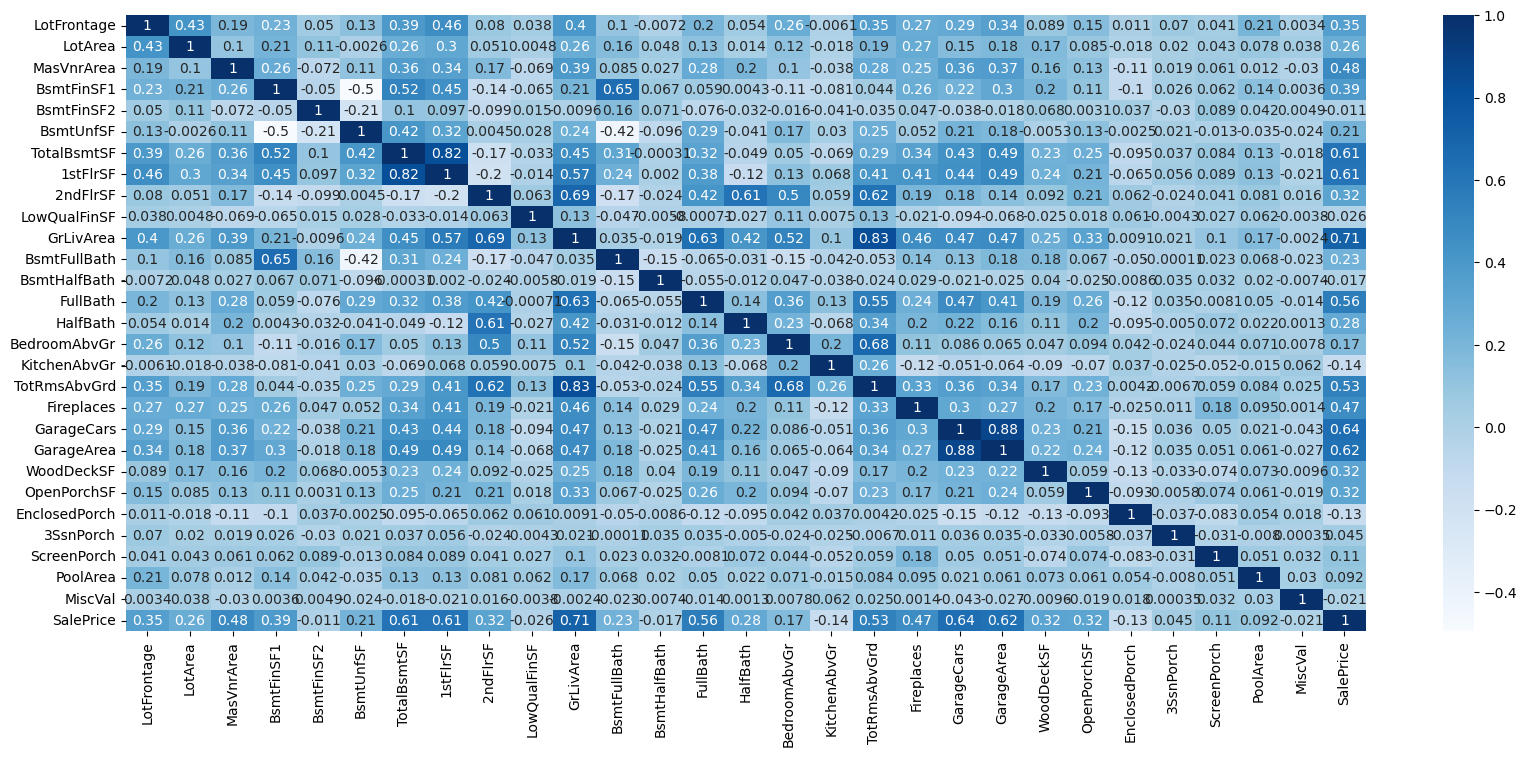

In [15]:
## visualization des correlations entre les variables quantitatives explicative de la base

plt.figure(figsize=(20, 8))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap='Blues', annot=True, )

In [212]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()
# Sélectionner les variables ayant une corrélation absolue faible avec la variable d'interet
target_variable = 'SalePrice'
threshold = 0.5
selected_variable = corr_matrix.loc[:, target_variable].abs() < threshold
selected_variable = selected_variable[selected_variable].index.tolist()
print(selected_variable)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [213]:
# Sélectionner les variables ayant une corrélation forte entre elles
threshold = 0.8
selected_variables = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
selected_variables = selected_variables.abs() > threshold
selected_variables = selected_variables.apply(lambda x: x.index[x].tolist())

# Afficher les variables sélectionnées
print(selected_variables)

LotFrontage                  []
LotArea                      []
MasVnrArea                   []
BsmtFinSF1                   []
BsmtFinSF2                   []
BsmtUnfSF                    []
TotalBsmtSF          [1stFlrSF]
1stFlrSF                     []
2ndFlrSF                     []
LowQualFinSF                 []
GrLivArea        [TotRmsAbvGrd]
BsmtFullBath                 []
BsmtHalfBath                 []
FullBath                     []
HalfBath                     []
BedroomAbvGr                 []
KitchenAbvGr                 []
TotRmsAbvGrd                 []
Fireplaces                   []
GarageCars         [GarageArea]
GarageArea                   []
WoodDeckSF                   []
OpenPorchSF                  []
EnclosedPorch                []
3SsnPorch                    []
ScreenPorch                  []
PoolArea                     []
MiscVal                      []
SalePrice                    []
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\266866291.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  selected_variables = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))


In [214]:
# application des resultats du chunk precedent
dff= df.drop(columns=['TotRmsAbvGrd', 'GarageArea', '1stFlrSF'])
dff= dff.drop(columns=selected_variable)

### Transformation of year var

In [215]:
##YearBuilt YearRemodAdd GarageYrBlt YrSold MoSold   
dff['YearBuilt'] =pd.to_numeric(dff['YearBuilt'])
dff['YrSold'] = pd.to_numeric(dff['YrSold'])
dff['Age_house']=dff['YrSold'] - dff['YearBuilt']
dff['Age_house'].head()

Id
1     5
2    31
3     7
4    91
5     8
Name: Age_house, dtype: int64

In [217]:
dff['YearRemodAdd'] =pd.to_numeric(dff['YearRemodAdd'])
dff['age_renov']=dff['YearRemodAdd']-dff['YearBuilt']
dff['age_renov'].head()

Id
1     0
2     0
3     1
4    55
5     0
Name: age_renov, dtype: int64

In [219]:
dff['MoSold'] = pd.to_numeric(dff['MoSold'])
dff['MoSold'].head()

Id
1     2
2     5
3     9
4     2
5    12
Name: MoSold, dtype: int64

In [220]:
#dff['GarageYrBlt'].head()

replace_values = {'No Garage': 0}
dff["GarageYrBlt"] = dff["GarageYrBlt"].replace(replace_values)

In [221]:
dff['GarageYrBlt'] = pd.to_numeric(dff['GarageYrBlt'])
dff['Age_garage']=dff['YrSold']- dff['GarageYrBlt']
dff['Age_garage'].head()

Id
1     5
2    31
3     7
4     8
5     8
Name: Age_garage, dtype: int64

In [222]:
dff= dff.drop(columns=['GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'YrSold'])

## test d'anova

In [223]:
categorical_features = dff.select_dtypes(include="category").columns

tab_variance=pd.DataFrame()
for col_name in list(categorical_features):
    tab_variance=pd.concat([tab_variance,pg.homoscedasticity(data=dff,dv='SalePrice',group=col_name)],ignore_index=True)

tab_variance.index=categorical_features
tab_variance

W          pval  equal_var
MSSubClass      6.988575  4.164050e-14      False
MSZoning       12.305646  7.635312e-10      False
Street          0.098311  7.539107e-01       True
Alley          11.906383  7.428894e-06      False
LotShape        4.443664  4.078334e-03      False
LandContour     5.662781  7.424883e-04      False
Utilities       0.869215  3.513271e-01       True
LotConfig       1.015717  3.979476e-01       True
LandSlope       2.596517  7.487757e-02       True
Neighborhood   12.204777  3.362249e-43      False
Condition1      3.662500  3.085099e-04      False
Condition2      0.991109  4.358734e-01       True
BldgType        9.538031  1.300563e-07      False
HouseStyle      7.689885  3.799137e-09      False
OverallQual    33.092966  2.814138e-53      False
OverallCond     9.471874  7.767553e-13      False
RoofStyle      16.958873  2.516821e-16      False
RoofMatl        2.884400  5.386528e-03      False
Exterior1st     7.789928  4.019625e-16      False
Exterior2nd     7.947056  1.716931e-17      False
MasVnrType     18.642097  7.239634e-12      False
ExterQual      51.647224  1.012596e-31      False
ExterCond       2.155431  7.184968e-02       True
Foundation     21.017081  2.471815e-20      False
BsmtQual       45.854392  2.541460e-36      False
BsmtCond        4.994651  5.330967e-04      False
BsmtExposure   28.172805  1.437090e-22      False
BsmtFinType1   20.537936  3.461791e-23      False
BsmtFinType2    4.932307  5.252811e-05      False
Heating         1.543331  1.733100e-01       True
HeatingQC      25.710861  1.294766e-20      False
CentralAir     16.870940  4.223228e-05      False
Electrical      7.032674  1.318412e-05      False
KitchenQual    75.908894  1.279288e-45      False
Functional      3.205830  3.941556e-03      False
FireplaceQu    35.392411  2.937041e-34      False
GarageType     19.699314  3.275544e-22      False
GarageFinish   50.605620  4.124459e-31      False
GarageQual      6.632162  4.082319e-06      False
GarageCond      6.226256  1.009953e-05      False
PavedDrive      9.278563  9.904149e-05      False
PoolQC          8.075383  2.456264e-05      False
Fence          11.206915  5.883075e-09      False
MiscFeature     1.404928  2.299960e-01       True
SaleType        5.734204  3.290135e-07      False
SaleCondition   8.540863  5.537686e-08      False

In [224]:
var_select=tab_variance['equal_var']

#var_select=  var_select[var_select==False].index.tolist()
var_select=  var_select[var_select].index.tolist()
print(var_select)

['Street', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'ExterCond', 'Heating', 'MiscFeature']


In [242]:
#formation des deux bases
dff1= dff.copy()
dff2= dff.drop(columns=var_select)

In [235]:
dff1.info()
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   Street         1460 non-null   category
 3   Alley          1460 non-null   category
 4   LotShape       1460 non-null   category
 5   LandContour    1460 non-null   category
 6   Utilities      1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  Condition1     1460 non-null   category
 11  Condition2     1460 non-null   category
 12  BldgType       1460 non-null   category
 13  HouseStyle     1460 non-null   category
 14  OverallQual    1460 non-null   category
 15  OverallCond    1460 non-null   category
 16  RoofStyle      1460 non-null   category
 17  RoofMatl       1460 non-null   ca

### separation des variables en test set et train set

In [243]:
# separer la  var a expliquée et les var explicatives
y1=dff['SalePrice']
X1=dff.drop(columns=['SalePrice'])
# separer la  var a expliquée et les var explicatives
y2=dff2['SalePrice']
X2=dff2.drop(columns=['SalePrice'])

#categorical_features = X.select_dtypes(include="category").columns
#print(f"Numerical features:\n {categorical_features}")

#numerical_features = X.select_dtypes(include="number").columns

In [244]:
## split1 
log_y1 = np.log(y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, log_y1, test_size=0.20, random_state=20)
## split2 
log_y2 = np.log(y2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, log_y2, test_size=0.20, random_state=20)

## Random Forest Regressor

In [343]:

models_score=pd.DataFrame(columns=["Model","R2_Score","MSE","RMSE","RMSE_CV","MAE"])

In [246]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [344]:
#model eval

METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           
           max_error,
          ]

def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])

def get_performance(train_real_value,train_estimated_value,test_real_value=None,
                    test_estimated_value=None,metrics=METRICS):
    perfs=[]
    for metric_func in metrics:
        perfs.append((metric_func.__name__,metric_func(train_real_value,train_estimated_value)))
    """
    Plot the train's prediction and real value: make a comparison
    """
    fig,ax=plt.subplots(ncols=4,figsize=(16,4))
    PredictionErrorDisplay.from_predictions(train_real_value,train_estimated_value,
                                            kind='actual_vs_predicted',ax=ax[0])
    ax[0].set_title('Valeurs réelles vs. predictions')
    PredictionErrorDisplay.from_predictions(train_real_value,train_estimated_value,
                                            kind='residual_vs_predicted',ax=ax[1])
    ax[1].set_title('Valeurs résiduelles vs. predictions')
    fig.suptitle('Train set')
    
    """
    Plot the test's prediction and real value: make a comparison
    """
    if test_real_value is not None and test_estimated_value is not None:
        PredictionErrorDisplay.from_predictions(test_real_value,test_estimated_value,
                                                scatter_kwargs={'color':'orange'},
                                                kind='actual_vs_predicted',ax=ax[2])
        ax[2].set_title('Valeurs réelles vs. predictions')
        PredictionErrorDisplay.from_predictions(test_real_value,test_estimated_value,
                                                scatter_kwargs={'color':'orange'},
                                                kind='residual_vs_predicted',ax=ax[3])
        ax[3].set_title('Valeurs résiduelles vs. predictions')
        fig.suptitle('Test set')

    return pd.DataFrame(perfs,columns=['metric','value'])  
def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [345]:
#from sklearn.metrics import get_scorer_names
#print(get_scorer_names())

In [346]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
ordinal_feature=list(labels.keys())
ordinal_cat= list(labels.values())


NUMERIC_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="median")),
                       ("sacaler" , StandardScaler())])
CATEGORY_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                       ("hot" , OneHotEncoder(handle_unknown="ignore"))])
CATEGORY_TRANSFORMER_order = Pipeline( steps=[("imputer",SimpleImputer(strategy="constant")),("ordi", OrdinalEncoder(categories=ordinal_cat, handle_unknown="error"))])

preprocessor = ColumnTransformer( transformers=[
        ('num', NUMERIC_TRANSFORMER, make_column_selector(dtype_include="number")),
        ('ord',  CATEGORY_TRANSFORMER_order, ordinal_feature),
        ('cat', CATEGORY_TRANSFORMER, make_column_selector(dtype_include="category"))
    ])

reg_forest=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", RandomForestRegressor(n_estimators=100, random_state=416))])

In [347]:
    # Ajoutez RFE à la pipeline en utilisant l'estimateur donné
#rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=416), n_features_to_select=10) 
reg_forest=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", RandomForestRegressor(n_estimators=100, random_state=416))])
reg_forest

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('sacal...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=416,
                                       verbose=0, warm_start=False))],
         verbose=False)

#### modélisation avec le premier dataframe: dff1

In [352]:
categorical_features = X1_train.select_dtypes(include="category").columns
reg_forest.fit(X1_train, y1_train)
print(f"Model score - training data: {reg_forest.score(X1_train, y1_train)}")
print(f"Model score - test data: {reg_forest.score(X1_test, y1_test)}")

Model score - training data: 0.9819615820387653
Model score - test data: 0.8697003850142759


In [348]:
def courbe(y_train, y_test, y_test_pred,y_train_pred):      
    fig,ax=plt.subplots(ncols=4,figsize=(16,4))    # Train set: actual values vs. predictions    ax[0].scatter(y_train,y_train_pred)    ax[0].set_title('Actual values vs. predictions')    a, b = np.polyfit(y_train_pred, y_train, 1)    line = a * y_train_pred + b    ax[0].plot(y_train_pred, line, color='red', lw=3)    # Train set: residuals vs. predictions    residuals = y_train - y_train_pred    ax[1].scatter(y_train_pred,residuals)    ax[1].set_title('Residuals vs. predictions')    a, b = np.polyfit(y_train_pred, residuals, 1)    line = a * y_train_pred + b    ax[1].plot(y_train_pred, line, color='red', lw=3)    if y_test is not None and y_test_pred is not None:        # Test set: actual values vs. predictions        ax[2].scatter(y_test,y_test_pred,color='orange')        ax[2].set_title('Actual values vs. predictions')        a, b = np.polyfit(y_test_pred, y_test, 1)        line = a * y_test_pred + b        ax[2].plot(y_test_pred, line, color='red', lw=3)        # Test set: residuals vs. predictions        residuals = y_test - y_test_pred        ax[3].scatter(y_test_pred,residuals,color='orange')        ax[3].set_title('Residuals vs. predictions')        a, b = np.polyfit(y_test_pred, residuals, 1)        line = a * y_test_pred + b        ax[3].plot(y_test_pred, line, color='red', lw=3)    fig.suptitle('Train set' if y_test is None or y_test_pred is None else 'Test set')

In [50]:
print(RandomForestRegressor(random_state = 42).get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [240]:
param_grid_reg = {
    
    'regressor__bootstrap': [True, False],
    'regressor__criterion': ['neg_mean_squared_error', 'squared_error'],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None,3, 4, 5],
    'regressor__min_samples_split': [2, 3, 4],
    'regressor__min_samples_leaf': [1, 2, 3],
    'regressor__max_features': [1, 2, 3],
   # 'regressor_random_state': [42, 60, 416, 500],
    #"preprocessor__num__strategy": ["mean", "median"]
   
}

# create the GridSearchCV object
grid_search = GridSearchCV(reg_forest, param_grid_reg, cv=5,scoring="neg_mean_squared_error", return_train_score=True)

grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=nan,
                                                                                                        stra...
                         'regressor__criterion': ['neg_mean_squared_error',
                                                  'squared_error'],
                         'regressor__max_depth': [None, 3, 4, 5],
                         'regressor__max_features': [1, 2, 3],
                         'regressor__min_samples_leaf': [1, 2, 3],
                         'regressor__min_samples_split': [2, 3, 4],
                         'regressor__n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.fit(X1_train, y1_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

In [74]:
grid_cv_results = grid_search.cv_results_
for group in ["train", "test"]:
    mean_score = round(100 * grid_cv_results[f'mean_{group}_score'].mean(), 2)
    mean_std_score = round(grid_cv_results[f'std_{group}_score'].mean(), 2)
    print(f"{group}====================\nMean score (std): {mean_score} ({mean_std_score})\n")

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
cv_results = pd.DataFrame(grid_cv_results)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[["mean_train_score", "std_train_score",
            "mean_test_score", "std_test_score",
            "mean_fit_time", "std_fit_time",
            "mean_score_time", "std_score_time"
           ]]

In [353]:
## model evalu
y_test_pred1 =reg_forest.predict(X1_test)
y_train_pred1 = reg_forest.predict(X1_train)
score=get_all_performances(value_train=(y1_train, y_train_pred1),
                     values_test=(y1_test, y_test_pred1),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.981962  0.869700
1              mean_squared_error  0.002895  0.020230
2  mean_absolute_percentage_error  0.003076  0.008155
3                       max_error  0.405193  0.794183

In [354]:
def courbe(y_train, y_test, y_test_pred,y_train_pred):
    fig,ax=plt.subplots(ncols=4,figsize=(16,4))    
# Train set: actual values vs. predictions    
    ax[0].scatter(y_train,y_train_pred)    
    ax[0].set_title('Actual values vs. predictions')    
    a, b = np.polyfit(y_train_pred, y_train, 1)    
    line = a * y_train_pred + b   
    ax[0].plot(y_train_pred, line, color='red', lw=3)   
# Train set: residuals vs. predictions    
    residuals = y_train - y_train_pred    
    ax[1].scatter(y_train_pred,residuals)    
    ax[1].set_title('Residuals vs. predictions')    
    a, b = np.polyfit(y_train_pred, residuals, 1)    
    line = a * y_train_pred + b    
    ax[1].plot(y_train_pred, line, color='red', lw=3)   
    if y_test is not None and y_test_pred is not None:       
    # Test set: actual values vs. predictions        
        ax[2].scatter(y_test,y_test_pred,color='orange')       
        ax[2].set_title('Actual values vs. predictions')        
        a, b = np.polyfit(y_test_pred, y_test, 1)        
        line = a * y_test_pred + b        
        ax[2].plot(y_test_pred, line, color='red', lw=3)      
    # Test set: residuals vs. predictions        
        residuals = y_test - y_test_pred       
        ax[3].scatter(y_test_pred,residuals,color='orange')       
        ax[3].set_title('Residuals vs. predictions')       
        a, b = np.polyfit(y_test_pred, residuals, 1)       
        line = a * y_test_pred + b       
        ax[3].plot(y_test_pred, line, color='red', lw=3)   
        fig.suptitle('Train set' if y_test is None or y_test_pred is None else 'Test set')

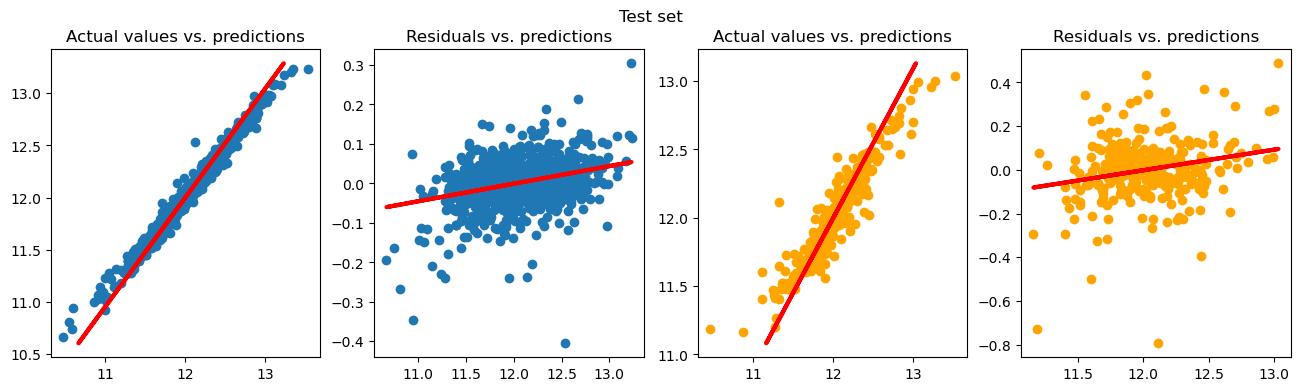

In [303]:
 courbe(y1_train, y1_test, y_test_pred1, y_train_pred1)

In [355]:
## cross validation# cross validation only
cv_results = cross_validate(reg_forest,
                            X1_train, y1_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)

cv_result_forest= pd.DataFrame(cv_results)

cv_result_forest

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  22.332231    0.088958  0.839393  0.981479                    -0.025444   
1  22.279259    0.070963  0.851917  0.981558                    -0.026333   
2  22.932907    0.083931  0.852111  0.979978                    -0.024599   
3  23.059814    0.079956  0.864533  0.980265                    -0.019922   
4  23.195731    0.068971  0.889246  0.980656                    -0.017566   
5  21.673597    0.078956  0.861104  0.980661                    -0.020782   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.002979                                -0.008639   
1                     -0.002895                                -0.009405   
2                     -0.003172                                -0.008772   
3                     -0.003218                                -0.008393   
4                     -0.003111                                -0.007971   
5                     -0.003141                                -0.008358   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.003137                     -0.102959   
1                                 -0.003096                     -0.112711   
2                                 -0.003224                     -0.104017   
3                                 -0.003195                     -0.100433   
4                                 -0.003168                     -0.095605   
5                                 -0.003184                     -0.100607   

   train_neg_mean_absolute_error  
0                      -0.037501  
1                      -0.037008  
2                      -0.038610  
3                      -0.038185  
4                      -0.037868  
5                      -0.038035

In [356]:
col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_forest[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
RMSE

test_RMSE  train_RMSE
0   0.159510    0.054583
1   0.162275    0.053805
2   0.156840    0.056324
3   0.141146    0.056723
4   0.132538    0.055778
5   0.144160    0.056046

In [358]:

R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "Randon Forest1",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

            Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\3611170038.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


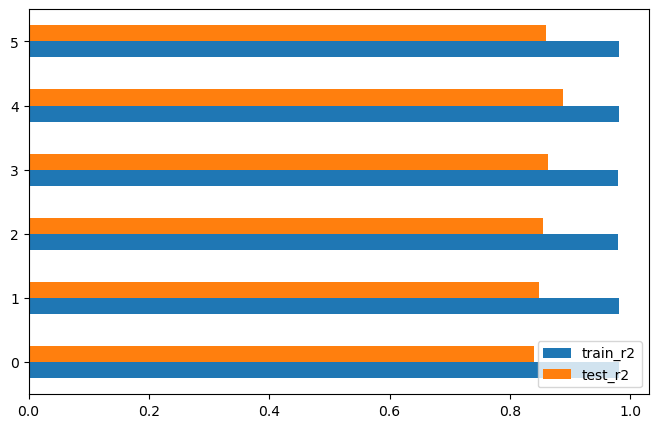

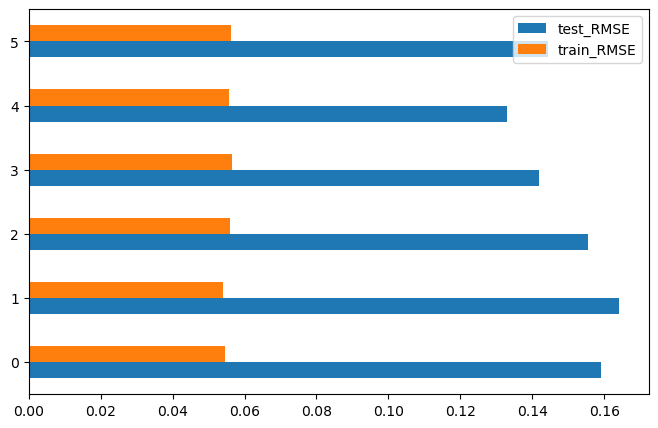

In [255]:
cv_result_forest[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));
RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [ ]:
avec ce resultat, on constate un surapprentissage

In [359]:
def get_input_features(model_pipeline, cat_step_name):
    """ Get model feature names used in training
    
    """

    all_feature_names = []

    for step_name, pipe_trans, feat_names in reg_forest["preprocessor"].transformers_:
        if step_name == cat_step_name:
            if cat_step_name=='cat':
                    all_feature_names.extend(pipe_trans
                                         .named_steps["hot"]
                                         .get_feature_names_out(input_features=categorical_features)
                                        )

        else:
            all_feature_names.extend(feat_names)
        
    return all_feature_names

In [361]:
model_features1 = get_input_features(model_pipeline=reg_forest, cat_step_name="cat")

In [260]:
dff['OverallQual'].describe()

count     1460
unique      10
top          5
freq       397
Name: OverallQual, dtype: object

In [362]:
df_feature_importance = pd.DataFrame(reg_forest.named_steps["regressor"].feature_importances_, columns=["coef"], index=model_features1)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance .sort_values("coef", key=lambda v: abs(v), ascending=False).head()

Shape: (326, 1)


coef
OverallQual    0.552221
GrLivArea      0.117427
TotalBsmtSF    0.063796
GarageCars     0.042292
OverallQual_7  0.022215

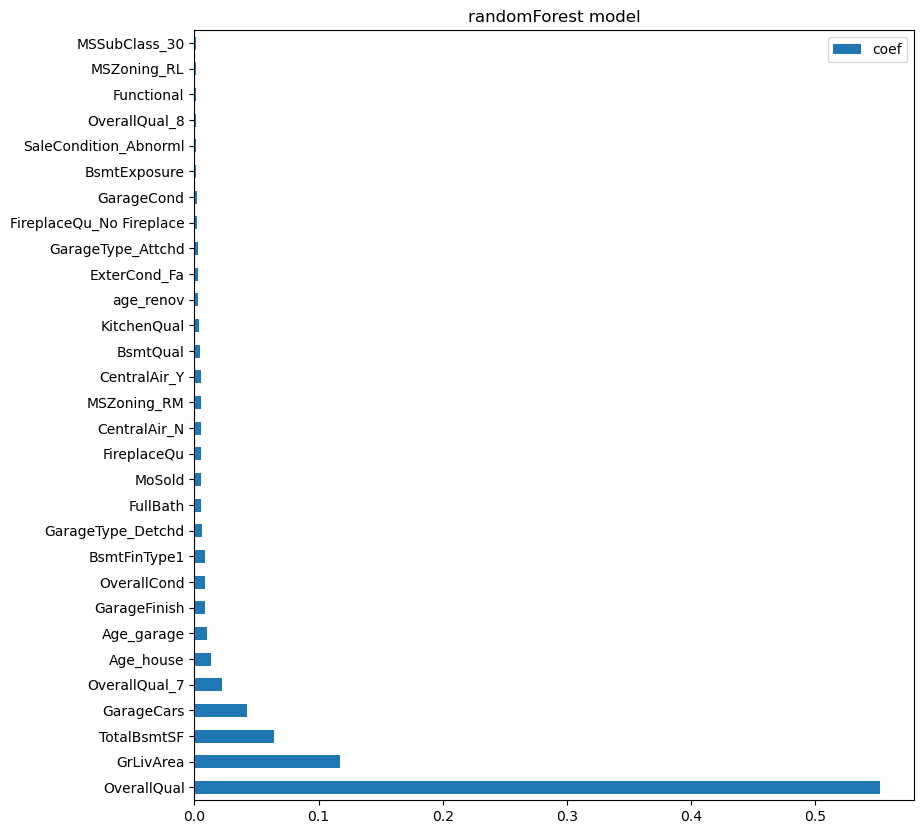

In [363]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("randomForest model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [ ]:
il n'ya que 3variabes imporatntes dans ce modele

In [364]:
threshold = 0.05
select_var = df_feature_importance["coef"]> threshold
select_var = select_var[select_var].index.tolist()
print(select_var)

['TotalBsmtSF', 'GrLivArea', 'OverallQual']


modelisons avec ces trois variables

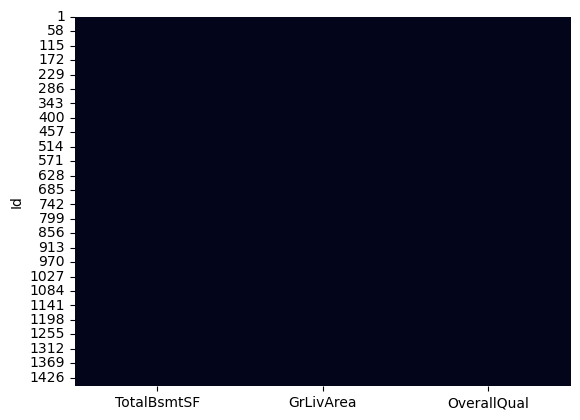

In [306]:
#y2=dff2['SalePrice']
new_dff1=dff1[select_var]
new_dff1.head()
#msno.matrix(df,color=(0.5,0.5,0.5))
sns.heatmap(new_dff1.isnull(), cbar=False)
plt.show()

In [365]:
new_X1_tarin=X1_train[select_var]
new_X1_test=X1_test[select_var]
rand=RandomForestRegressor(n_estimators=50, random_state=416)
rand.fit(new_X1_tarin, y1_train)
print(f"Model score - training data: {rand.score(new_X1_tarin, y1_train)}")
print(f"Model score - test data: {rand.score(new_X1_test, y1_test)}")

Model score - training data: 0.9615490773351824
Model score - test data: 0.7562007968994583


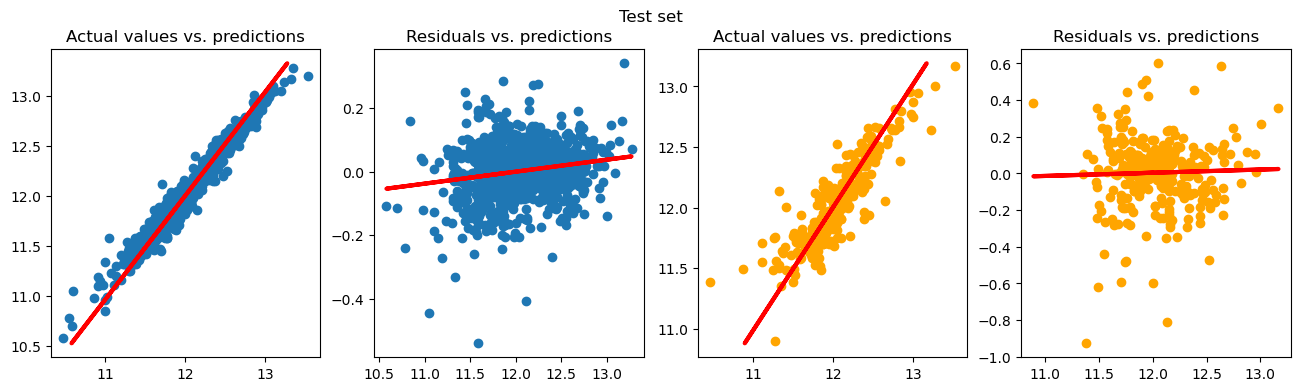

In [366]:
y_test_pred1 =rand.predict(new_X1_test)
y_train_pred1 = rand.predict(new_X1_tarin)
courbe(y1_train, y1_test, y_test_pred1, y_train_pred1)

In [367]:
## cross validation# cross validation only
cv_results = cross_validate(rand,
                            new_X1_tarin, y1_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)

cv_result_forest= pd.DataFrame(cv_results)

cv_result_forest

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.559683    0.023984  0.757305  0.959980                    -0.038448   
1  0.564680    0.031981  0.758783  0.960974                    -0.042895   
2  0.450748    0.016002  0.730381  0.962288                    -0.044846   
3  0.432753    0.016973  0.772807  0.960824                    -0.033412   
4  0.456756    0.015991  0.790943  0.962864                    -0.033158   
5  0.514683    0.029984  0.794832  0.959594                    -0.030698   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.006438                                -0.012158   
1                     -0.006126                                -0.012444   
2                     -0.005975                                -0.012475   
3                     -0.006387                                -0.011298   
4                     -0.005973                                -0.011239   
5                     -0.006563                                -0.010816   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.004681                     -0.145436   
1                                 -0.004727                     -0.148990   
2                                 -0.004586                     -0.148236   
3                                 -0.004757                     -0.135039   
4                                 -0.004722                     -0.134557   
5                                 -0.004832                     -0.130031   

   train_neg_mean_absolute_error  
0                      -0.055880  
1                      -0.056453  
2                      -0.054827  
3                      -0.056773  
4                      -0.056376  
5                      -0.057621

In [ ]:
## commentaires:
ce modele avec les variables les plus pertinenets est moins bon en r2

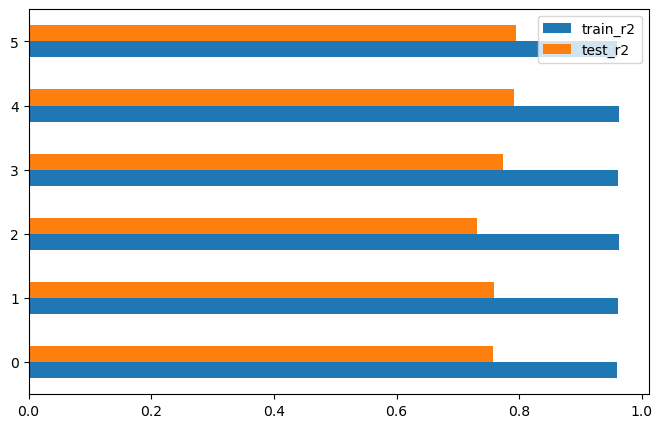

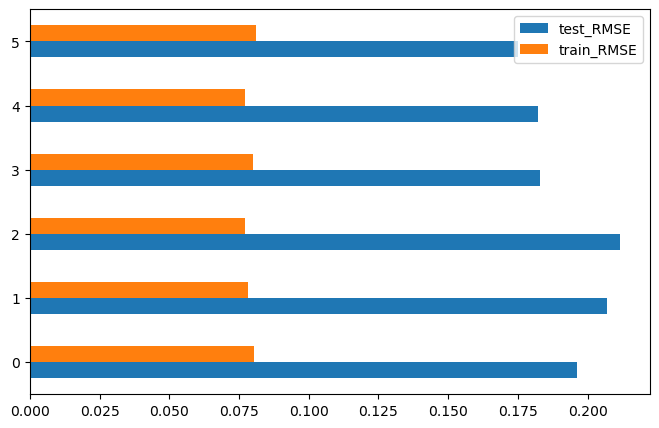

In [321]:
cv_result_forest[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));
RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [66]:
## model evalu
y_test_pred1 =rand.predict(new_X1_test)
y_train_pred1 = rand.predict(new_X1_tarin)
score=get_all_performances(value_train=(y1_train, y_train_pred1),
                     values_test=(y1_test, y_test_pred1),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.961549  0.756201
1              mean_squared_error  0.006170  0.037851
2  mean_absolute_percentage_error  0.004744  0.011741
3                       max_error  0.539756  0.926549

In [70]:
param_grid_reg = {
    
    'bootstrap': [True, False],
    'criterion': ['neg_mean_squared_error', 'squared_error'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None,3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [1, 2, 3],
   # 'regressor_random_state': [42, 60, 416, 500],
    #"preprocessor__num__strategy": ["mean", "median"]
   
}

# create the GridSearchCV object
grid_search = GridSearchCV(rand, param_grid_reg, cv=5,scoring="neg_mean_squared_error", return_train_score=True)

grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='squared_error',
                                             max_depth=None, max_features=1.0,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=416,
                                             verbo...start=False),
             n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['neg_mean_squared_error',
                                       'squared_error'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [1, 2, 3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [71]:
grid_search.fit(new_X1_tarin, y1_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

KeyboardInterrupt: 

In [ ]:
### faire le modele avec les varaible les plus importantes

In [73]:
rand=RandomForestRegressor(n_estimators=3, max_features=3, max_depth=10, random_state=30)
rand.fit(new_X1_tarin, y1_train)
print(f"Model score - training data: {rand.score(new_X1_tarin, y1_train)}")
print(f"Model score - test data: {rand.score(new_X1_test, y1_test)}")

Model score - training data: 0.8406698617910605
Model score - test data: 0.7850471564129344


In [76]:
## cross validation# cross validation only
cv_results = cross_validate(rand,
                            new_X1_tarin, y1_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)

cv_result_forest= pd.DataFrame(cv_results)

cv_result_forest

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.788850    0.035980  0.757305  0.959980                    -0.038448   
1  0.646324    0.021990  0.758783  0.960974                    -0.042895   
2  0.617016    0.030984  0.730381  0.962288                    -0.044846   
3  0.614992    0.022988  0.772807  0.960824                    -0.033412   
4  0.645214    0.030984  0.790943  0.962864                    -0.033158   
5  0.623433    0.030980  0.794832  0.959594                    -0.030698   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.006438                                -0.012158   
1                     -0.006126                                -0.012444   
2                     -0.005975                                -0.012475   
3                     -0.006387                                -0.011298   
4                     -0.005973                                -0.011239   
5                     -0.006563                                -0.010816   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.004681                     -0.145436   
1                                 -0.004727                     -0.148990   
2                                 -0.004586                     -0.148236   
3                                 -0.004757                     -0.135039   
4                                 -0.004722                     -0.134557   
5                                 -0.004832                     -0.130031   

   train_neg_mean_absolute_error  
0                      -0.055880  
1                      -0.056453  
2                      -0.054827  
3                      -0.056773  
4                      -0.056376  
5                      -0.057621

In [ ]:
ce modele est moins bon que le précédent.

#### modélisation avec la seconde base : dff2

In [368]:
#ordinal_cat
aa=labels.copy()

for key in var_select:
    labels.pop(key, None)

In [369]:
labels['OverallQual']

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [370]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
ordinal_feature=list(labels.keys())
ordinal_cat= list(labels.values())


NUMERIC_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="median")),
                       ("sacaler" , StandardScaler())])
CATEGORY_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                       ("hot" , OneHotEncoder(handle_unknown="ignore"))])
CATEGORY_TRANSFORMER_order = Pipeline( steps=[("imputer",SimpleImputer(strategy="constant")),("ordi", OrdinalEncoder(categories=ordinal_cat, handle_unknown="error"))])

preprocessor = ColumnTransformer( transformers=[
        ('num', NUMERIC_TRANSFORMER, make_column_selector(dtype_include="number")),
        ('ord',  CATEGORY_TRANSFORMER_order, ordinal_feature),
        ('cat', CATEGORY_TRANSFORMER, make_column_selector(dtype_include="category"))
    ])
reg_forest=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", RandomForestRegressor(n_estimators=100, random_state=416))])
reg_forest

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('sacal...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=416,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [371]:
categorical_features = X2_train.select_dtypes(include="category").columns
reg_forest.fit(X2_train, y2_train)
print(f"Model score - training data: {reg_forest.score(X2_train, y2_train)}")
print(f"Model score - test data: {reg_forest.score(X2_test, y2_test)}")

Model score - training data: 0.9822872849171076
Model score - test data: 0.8701492481739681


In [372]:
## model evalu
y_test_pred2 =reg_forest.predict(X2_test)
y_train_pred2 = reg_forest.predict(X2_train)
score=get_all_performances(value_train=(y2_train, y_train_pred2),
                     values_test=(y2_test, y_test_pred2),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.982287  0.870149
1              mean_squared_error  0.002842  0.020160
2  mean_absolute_percentage_error  0.003081  0.008104
3                       max_error  0.383596  0.808026

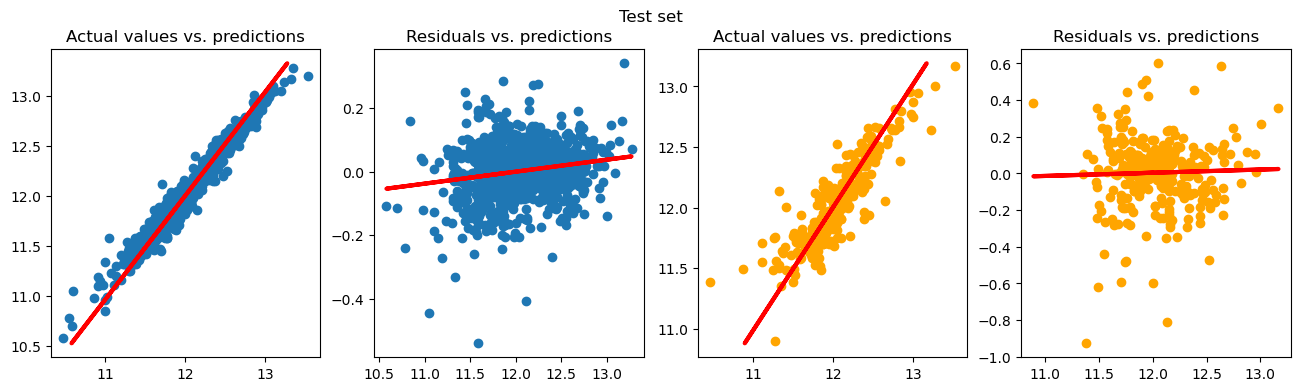

In [373]:
courbe(y1_train, y1_test, y_test_pred1, y_train_pred1)

In [374]:
## cross validation# cross validation only
cv_results = cross_validate(reg_forest,
                            X2_train, y2_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_forest= pd.DataFrame(cv_results)
cv_result_forest

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  21.351809    0.135903  0.844401  0.981428                    -0.024650   
1  21.433740    0.068970  0.851189  0.981637                    -0.026463   
2  21.712564    0.089950  0.853754  0.980270                    -0.024325   
3  24.443041    0.066962  0.860957  0.980426                    -0.020448   
4  21.334797    0.074962  0.886174  0.980827                    -0.018053   
5  22.164314    0.071980  0.864300  0.980479                    -0.020304   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.002988                                -0.008634   
1                     -0.002883                                -0.009418   
2                     -0.003126                                -0.008791   
3                     -0.003191                                -0.008508   
4                     -0.003084                                -0.008073   
5                     -0.003171                                -0.008322   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.003150                     -0.102899   
1                                 -0.003082                     -0.112850   
2                                 -0.003204                     -0.104287   
3                                 -0.003191                     -0.101785   
4                                 -0.003152                     -0.096865   
5                                 -0.003216                     -0.100162   

   train_neg_mean_absolute_error  
0                      -0.037649  
1                      -0.036839  
2                      -0.038379  
3                      -0.038132  
4                      -0.037667  
5                      -0.038411

In [375]:
col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_forest[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
RMSE

test_RMSE  train_RMSE
0   0.157004    0.054659
1   0.162673    0.053691
2   0.155966    0.055911
3   0.142997    0.056493
4   0.134363    0.055531
5   0.142492    0.056309

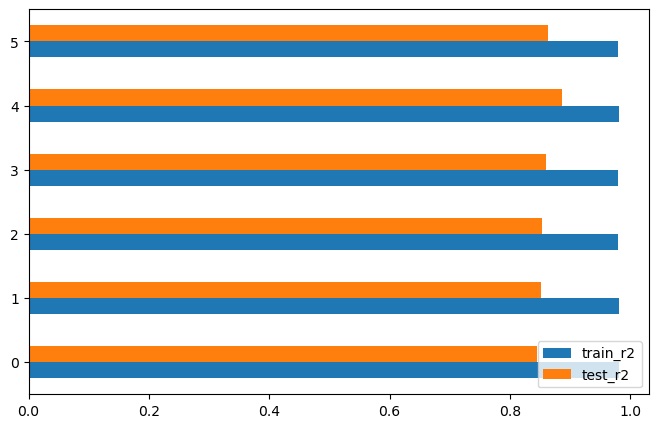

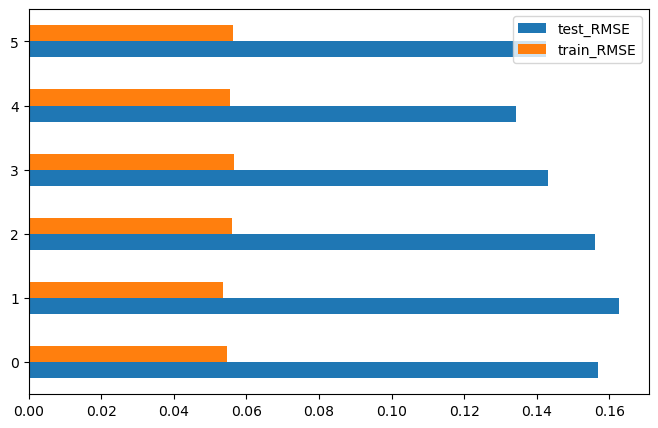

In [376]:
cv_result_forest[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));
RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [377]:
models_score

Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79

In [378]:



R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "Randon Forest2",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

            Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1  Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2  Randon Forest2      0.87  0.02  0.141421  0.149249  0.81


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\2519231739.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


In [111]:
model_features2 = get_input_features(model_pipeline=reg_forest, cat_step_name="cat")

In [379]:
df_feature_importance2 = pd.DataFrame(reg_forest.named_steps["regressor"].feature_importances_, columns=["coef"], index=model_features2)
print(f"Shape: {df_feature_importance2.shape}")

df_feature_importance2.sort_values("coef", key=lambda v: abs(v), ascending=False).head()

Shape: (291, 1)


coef
OverallQual    0.554581
GrLivArea      0.117635
TotalBsmtSF    0.064832
GarageCars     0.042371
OverallQual_7  0.019351

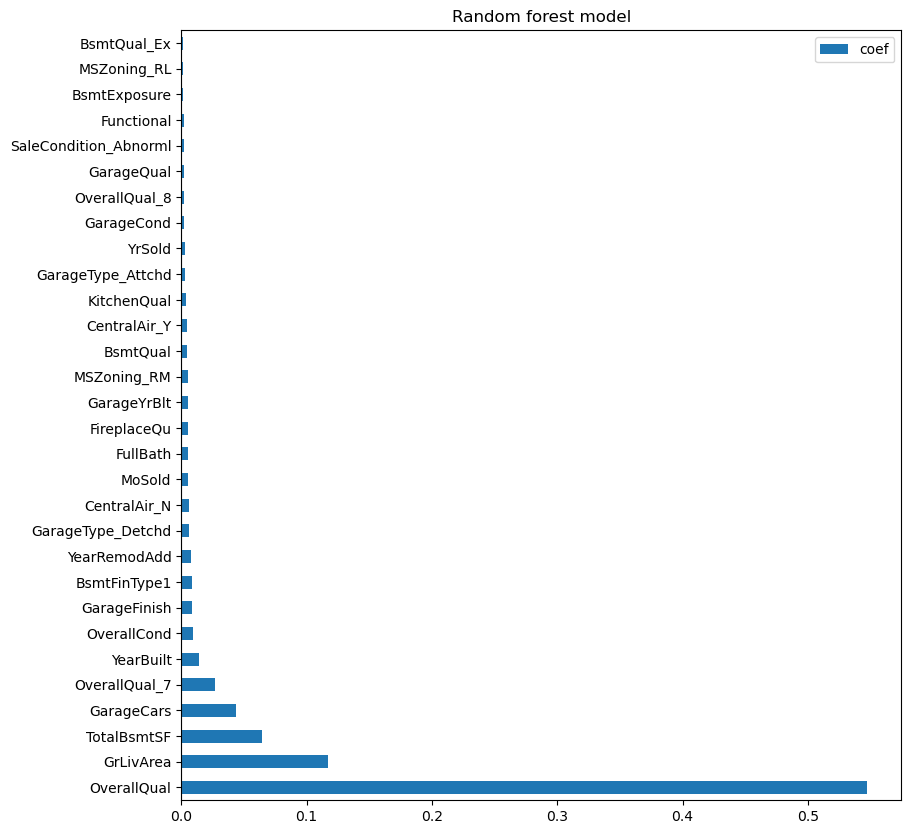

In [113]:
# top30 most important features
(df_feature_importance2
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Random forest model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

la modélisaatin avec les deux bases donnent pratiquement les mêmes resultats. Ansi, nous allons conserver la seconde base. Toutefois, il y a un overfiting et nous devons c
corriger cela.

#### modélisation avec les variables les plus pertinentes

In [380]:
threshold = 0.03
select_var = df_feature_importance2["coef"]> threshold
select_var = select_var[select_var].index.tolist()
print(select_var)

['TotalBsmtSF', 'GrLivArea', 'GarageCars', 'OverallQual']


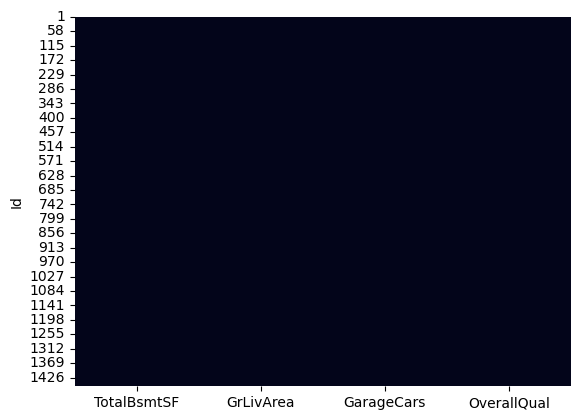

In [381]:
#y2=dff2['SalePrice']
new_dff2=dff2[select_var]
new_dff2.head()
#msno.matrix(df,color=(0.5,0.5,0.5))
sns.heatmap(new_dff2.isnull(), cbar=False)
plt.show()

In [382]:
reg_forest2=RandomForestRegressor(n_estimators=100, random_state=416)

In [384]:




## split2 
log_y2 = np.log(y2)
X21_train, X21_test, y21_train, y21_test = train_test_split(new_dff2, log_y2, test_size=0.20, random_state=20)

categorical_features = X21_train.select_dtypes(include="category").columns
reg_forest2.fit(X21_train, y21_train)
print(f"Model score - training data: {reg_forest2.score(X21_train, y21_train)}")
print(f"Model score - test data: {reg_forest2.score(X21_test, y21_test)}")

## model evalu
y_test_pred21 =reg_forest2.predict(X21_test)
y_train_pred21 = reg_forest2.predict(X21_train)
score=get_all_performances(value_train=(y21_train, y_train_pred21),
                     values_test=(y21_test, y_test_pred21),
                     metrics=METRICS
                    )
score

Model score - training data: 0.9688107201039046
Model score - test data: 0.7754058007314518


metric     train      test
0                        r2_score  0.968811  0.775406
1              mean_squared_error  0.005005  0.034870
2  mean_absolute_percentage_error  0.004178  0.011188
3                       max_error  0.468303  0.890212

In [385]:

## cross validation# cross validation only
cv_results = cross_validate(reg_forest2,
                            X21_train, y21_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_forest= pd.DataFrame(cv_results)
#print(cv_result_forest)

col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_forest[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
print(RMSE)

   test_RMSE  train_RMSE
0   0.186825    0.071992
1   0.191781    0.069720
2   0.187992    0.071573
3   0.180672    0.071235
4   0.171627    0.071065
5   0.164530    0.071291


In [386]:
R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "Randon Forest perf",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

                Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2      Randon Forest2      0.87  0.02  0.141421  0.149249  0.81
3  Randon Forest perf      0.78  0.03  0.173205  0.180571  0.89


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\2739763072.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


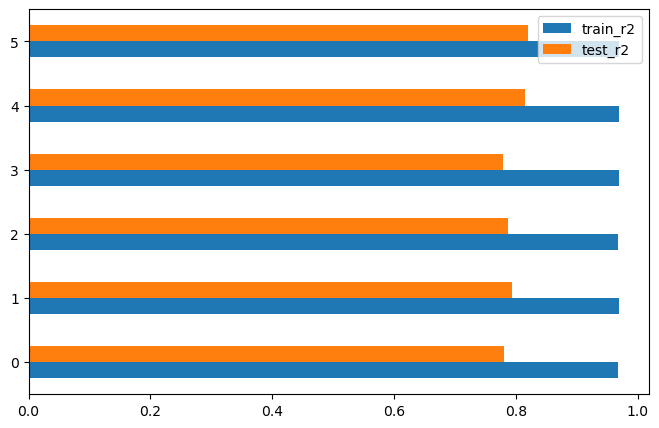

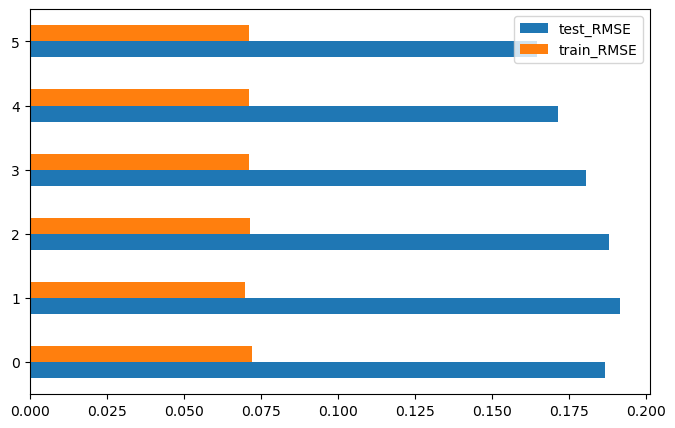

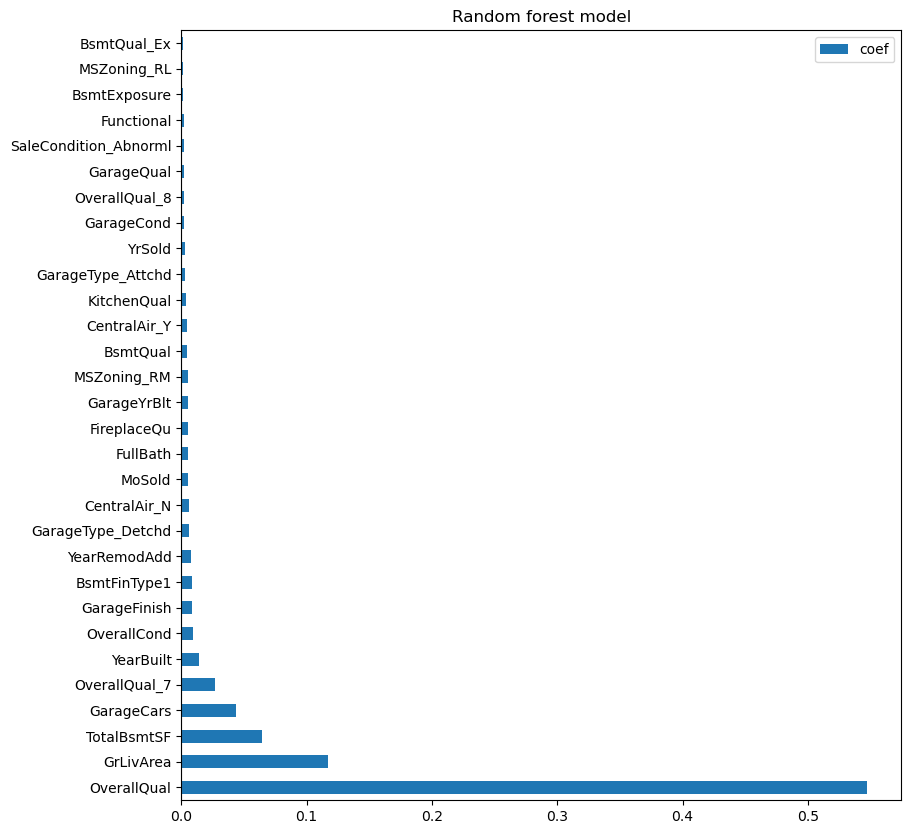

In [125]:
cv_result_forest[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));
RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));
df_feature_importance2.sort_values("coef", key=lambda v: abs(v), ascending=False).head()
# top30 most important features
(df_feature_importance2
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Random forest model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

## XGBOOST

#### Pour ce modèle nous allons utiliser la bse 2:  dff2

In [128]:
#!pip install xgboost
from xgboost import XGBRegressor

In [417]:
reg_XG=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", XGBRegressor())])

In [418]:
categorical_features = X2_train.select_dtypes(include="category").columns
reg_XG.fit(X2_train, y2_train)
print(f"Model score - training data: {reg_XG.score(X2_train, y2_train)}")
print(f"Model score - test data: {reg_XG.score(X2_test, y2_test)}")

Model score - training data: 0.9986083693526158
Model score - test data: 0.8577580286256242


In [419]:

## model evalu
y_test_pred2 =reg_XG.predict(X2_test)
y_train_pred2 = reg_XG.predict(X2_train)

score=get_all_performances(value_train=(y2_train, y_train_pred2),
                     values_test=(y2_test, y_test_pred2),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.998608  0.857758
1              mean_squared_error  0.000223  0.022084
2  mean_absolute_percentage_error  0.000889  0.008495
3                       max_error  0.065364  0.719803

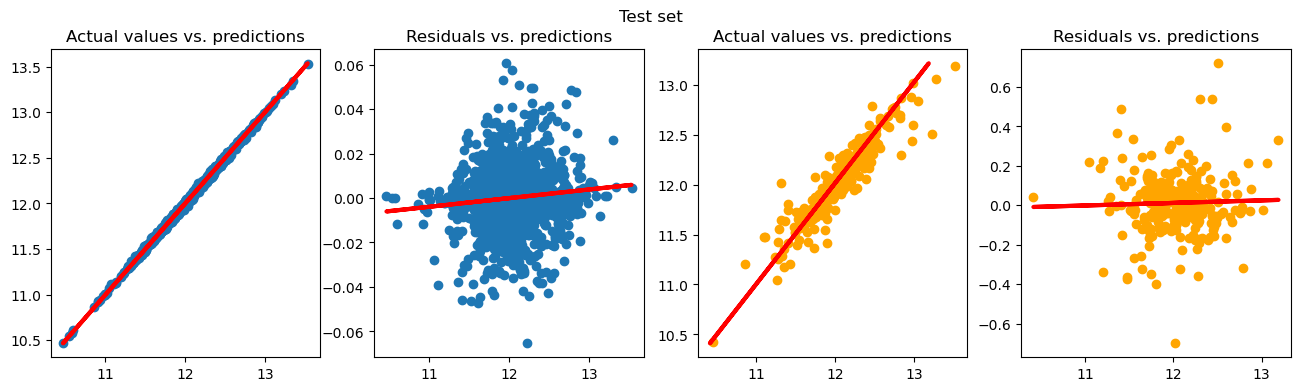

In [420]:
courbe(y1_train, y1_test, y_test_pred2, y_train_pred2)

In [391]:
## cross validation# cross validation only
cv_results = cross_validate(reg_XG,
                            X2_train, y2_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_XG= pd.DataFrame(cv_results)
cv_result_XG

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.758567    0.223873  0.842536  0.999110                    -0.025492   
1  0.700599    0.089947  0.880852  0.999235                    -0.020133   
2  0.626641    0.096945  0.878870  0.999224                    -0.019634   
3  0.572672    0.101944  0.871943  0.999208                    -0.019163   
4  0.647631    0.098943  0.882662  0.999167                    -0.018505   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.000142                                -0.008539   
1                     -0.000121                                -0.008692   
2                     -0.000124                                -0.007945   
3                     -0.000129                                -0.007895   
4                     -0.000134                                -0.008264   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.000692                     -0.101726   
1                                 -0.000640                     -0.104072   
2                                 -0.000633                     -0.094755   
3                                 -0.000657                     -0.094417   
4                                 -0.000678                     -0.099044   

   train_neg_mean_absolute_error  
0                      -0.008325  
1                      -0.007702  
2                      -0.007605  
3                      -0.007897  
4                      -0.008136

In [392]:
col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_XG[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
RMSE

test_RMSE  train_RMSE
0   0.159663    0.011934
1   0.141891    0.010995
2   0.140120    0.011143
3   0.138432    0.011362
4   0.136033    0.011589

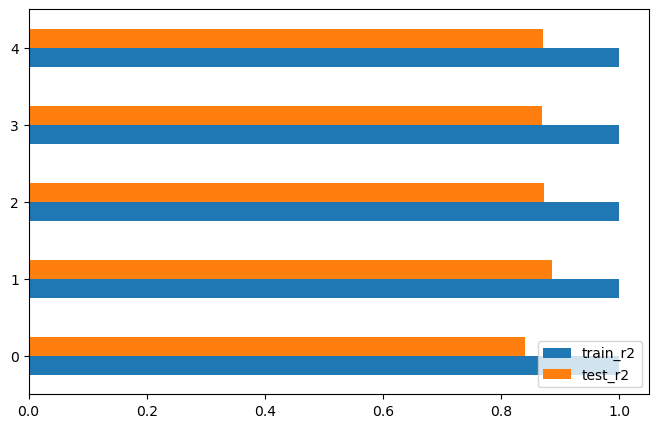

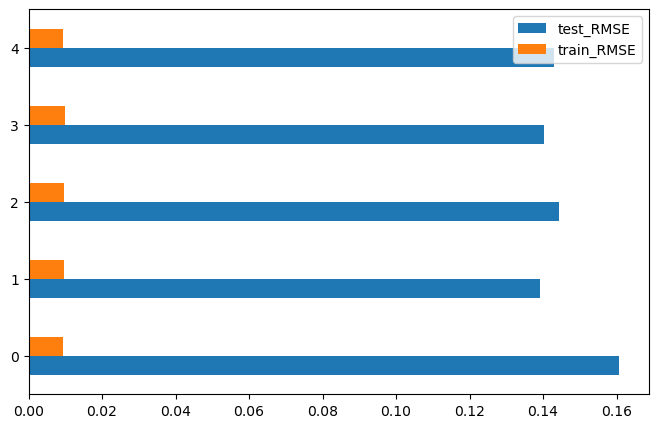

In [135]:
cv_result_XG[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [421]:
#model_features1 = get_input_features(model_pipeline=reg_XG, cat_step_name="cat")
model_features2 = get_input_features(model_pipeline=reg_XG, cat_step_name ="cat")
#print(model_features2)
df_feature_importance = pd.DataFrame(reg_XG.named_steps["regressor"].feature_importances_, columns=["coef"], index=model_features2)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

ValueError: Shape of passed values is (270, 1), indices imply (291, 1)

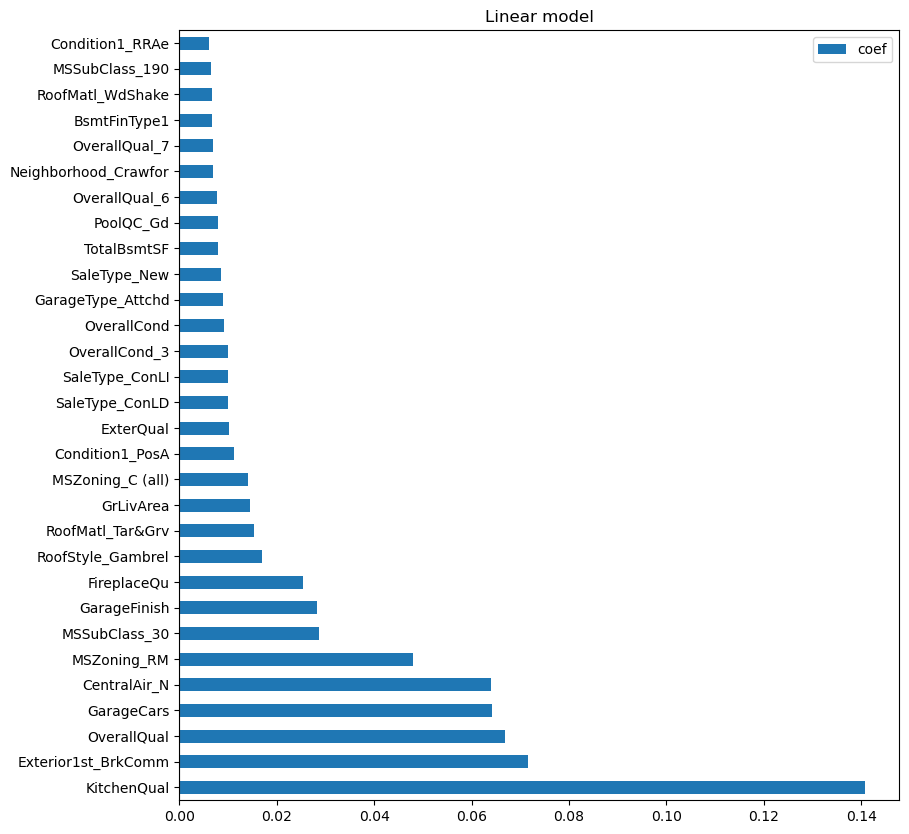

In [342]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [394]:
R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "XGBOOST1",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

                Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2      Randon Forest2      0.87  0.02  0.141421  0.149249  0.81
3  Randon Forest perf      0.78  0.03  0.173205  0.180571  0.89
4            XGBOOST1      0.87  0.02  0.141421  0.143228  0.82


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\4289779855.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


In [ ]:
print(models_score)

#### modelisations avec les variables les plus pertinentes

In [395]:
threshold = 0.03
select_var = df_feature_importance["coef"]> threshold
select_var = select_var[select_var].index.tolist()
print(select_var)

['GarageCars', 'OverallQual', 'KitchenQual', 'MSZoning_RM', 'Exterior1st_BrkComm', 'CentralAir_N']


In [396]:
#select_var=['OverallQual', 'BsmtQual', 'TotalBsmtSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'GarageCond', 'PoolQC','MSSubClass', 'MSZoning','Neighborhood',
           #'RoofStyle', 'Exterior1st', 'Exterior2nd', 'CentralAir', 'SaleType']
select_var=['OverallQual','GarageCars','KitchenQual','GarageCond', 'Exterior1st', 'CentralAir']
new_dff2=dff2[select_var]
new_dff2.head()
#msno.matrix(df,color=(0.5,0.5,0.5))
#sns.heatmap(new_dff2.isnull(), cbar=False)
#plt.show()

OverallQual  GarageCars KitchenQual GarageCond Exterior1st CentralAir
Id                                                                      
1            7           2          Gd         TA     VinylSd          Y
2            6           2          TA         TA     MetalSd          Y
3            7           2          Gd         TA     VinylSd          Y
4            7           3          Gd         TA     Wd Sdng          Y
5            8           3          Gd         TA     VinylSd          Y

In [397]:
#reg_XG=XGBRegressor()

NUMERIC_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="median")),
                       ("sacaler" , StandardScaler())])
CATEGORY_TRANSFORMER = Pipeline( steps= [("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                       ("hot" , OneHotEncoder(handle_unknown="ignore"))])
#CATEGORY_TRANSFORMER_order = Pipeline( steps=[("imputer",SimpleImputer(strategy="constant")),("ordi", OrdinalEncoder(categories=ordinal_cat, handle_unknown="error"))])

preprocessor = ColumnTransformer( transformers=[
        ('num', NUMERIC_TRANSFORMER, make_column_selector(dtype_include="number")),
        #('ord',  CATEGORY_TRANSFORMER_order, ordinal_feature),
        ('cat', CATEGORY_TRANSFORMER, make_column_selector(dtype_include="category"))
    ])

reg_XG=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", XGBRegressor())])

In [156]:
print(XGBRegressor().get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [160]:
from sklearn.model_selection import GridSearchCV

# définir les hyperparamètres à tester
param_grid = {
    "regressor__learning_rate": [0.1, 0.05, 0.01],
    "regressor__max_depth": [3, 5, 7],
    "regressor__n_estimators": [100, 500, 1000]
}

grid_search = GridSearchCV(reg_XG, param_grid, cv=5)
grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=nan,
                                                                                                        stra...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     objective='reg:squarederror',
                                                     predictor=None, ...))],
                                verbose=False),
             n_jobs=None,
             param_grid={'regressor__learning_rate': [0.1, 0.05, 0.01],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
grid_search.fit(X21_train, y21_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

KeyboardInterrupt: 

In [422]:
## split2 
log_y2 = np.log(y2)
X21_train, X21_test, y21_train, y21_test = train_test_split(new_dff2, log_y2, test_size=0.20, random_state=20)

categorical_features = X21_train.select_dtypes(include="category").columns
reg_XG.fit(X21_train, y21_train)
print(f"Model score - training data: {reg_XG.score(X21_train, y21_train)}")
print(f"Model score - test data: {reg_XG.score(X21_test, y21_test)}")

## model evalu
y_test_pred21 =reg_XG.predict(X21_test)
y_train_pred21 = reg_XG.predict(X21_train)
score=get_all_performances(value_train=(y21_train, y_train_pred21),
                     values_test=(y21_test, y_test_pred21),
                     metrics=METRICS
                    )
score

Model score - training data: 0.851243392629712
Model score - test data: 0.6730700820099231


metric     train      test
0                        r2_score  0.851243  0.673070
1              mean_squared_error  0.023870  0.050758
2  mean_absolute_percentage_error  0.009364  0.013940
3                       max_error  0.705553  0.883284

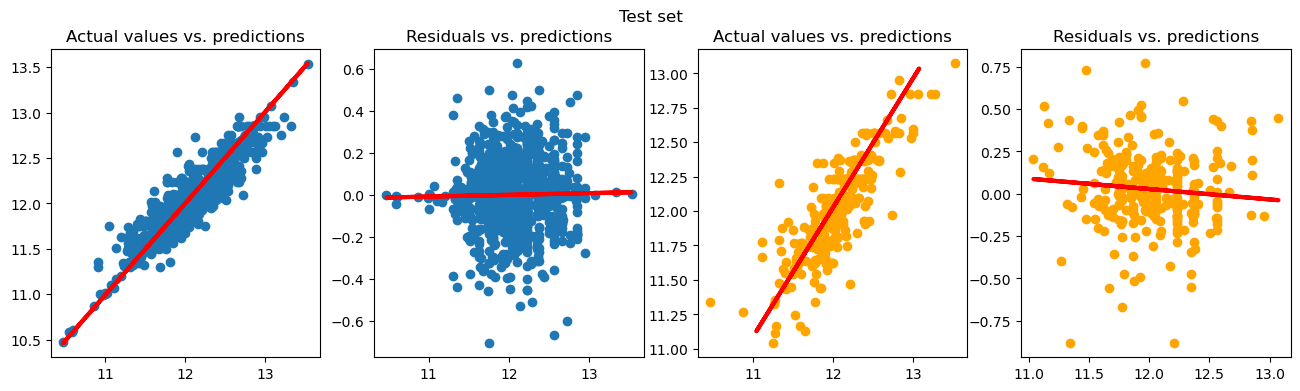

In [424]:
courbe(y1_train, y1_test, y_test_pred21, y_train_pred21)

In [399]:
## cross validation# cross validation only
cv_results = cross_validate(reg_XG,
                            X21_train, y21_train,
                            cv=6,
                            scoring=("r2", "neg_mean_squared_error", 
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_xg= pd.DataFrame(cv_results)
#print(cv_result_forest)

col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_xg[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
print(RMSE)

   test_RMSE  train_RMSE
0   0.187380    0.153723
1   0.226592    0.149972
2   0.202243    0.153124
3   0.221462    0.153150
4   0.213824    0.148806
5   0.207738    0.150366


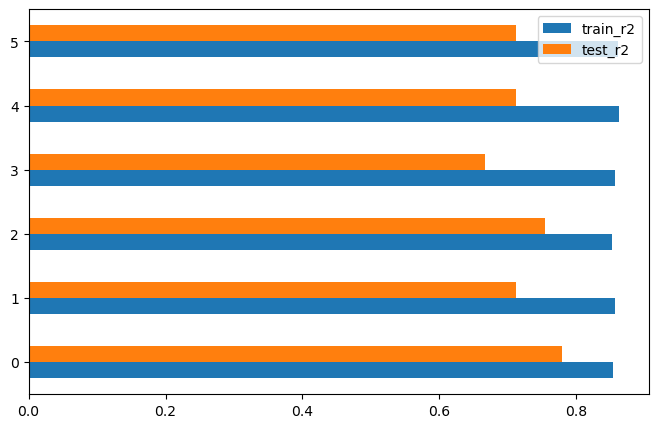

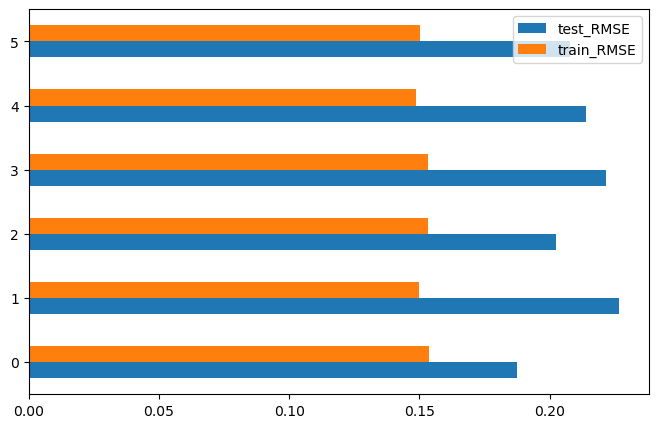

In [400]:
cv_result_xg[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [401]:
R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "XGBOOST perf",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

                Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2      Randon Forest2      0.87  0.02  0.141421  0.149249  0.81
3  Randon Forest perf      0.78  0.03  0.173205  0.180571  0.89
4            XGBOOST1      0.87  0.02  0.141421  0.143228  0.82
5        XGBOOST perf      0.67  0.05  0.223607  0.209873  0.88


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\2803559201.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


## Adaboost REGRESSOR

In [162]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

In [402]:
reg_Ada=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", AdaBoostRegressor(DecisionTreeRegressor()))])

In [403]:
categorical_features = X2_train.select_dtypes(include="category").columns
reg_Ada.fit(X2_train, y2_train)
print(f"Model score - training data: {reg_Ada.score(X2_train, y2_train)}")
print(f"Model score - test data: {reg_Ada.score(X2_test, y2_test)}")

Model score - training data: 0.9994627585505321
Model score - test data: 0.8744718291902063


In [405]:
## model evalu
y_test_pred2 =reg_Ada.predict(X2_test)
y_train_pred2 = reg_Ada.predict(X2_train)

score=get_all_performances(value_train=(y2_train, y_train_pred2),
                     values_test=(y2_test, y_test_pred2),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.999463  0.874472
1              mean_squared_error  0.000086  0.019489
2  mean_absolute_percentage_error  0.000212  0.008199
3                       max_error  0.063295  0.710570

In [406]:
## cross validation# cross validation only
cv_results = cross_validate(reg_Ada,
                            X2_train, y2_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_ada= pd.DataFrame(cv_results)
cv_result_ada

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  8.089009    0.067962  0.828727  0.999535                    -0.027728   
1  9.014846    0.072959  0.864944  0.999423                    -0.022821   
2  8.732016    0.052951  0.852505  0.999459                    -0.023907   
3  7.706575    0.053977  0.867810  0.999429                    -0.019782   
4  7.651643    0.059944  0.857463  0.999551                    -0.022479   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.000074                                -0.009010   
1                     -0.000091                                -0.008683   
2                     -0.000087                                -0.008453   
3                     -0.000093                                -0.008078   
4                     -0.000072                                -0.008973   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.000201                     -0.107009   
1                                 -0.000222                     -0.103634   
2                                 -0.000197                     -0.101207   
3                                 -0.000223                     -0.096822   
4                                 -0.000196                     -0.107387   

   train_neg_mean_absolute_error  
0                      -0.002428  
1                      -0.002672  
2                      -0.002380  
3                      -0.002678  
4                      -0.002359

In [407]:
col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_ada[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
RMSE

test_RMSE  train_RMSE
0   0.166517    0.008625
1   0.151067    0.009547
2   0.154620    0.009304
3   0.140648    0.009642
4   0.149930    0.008507

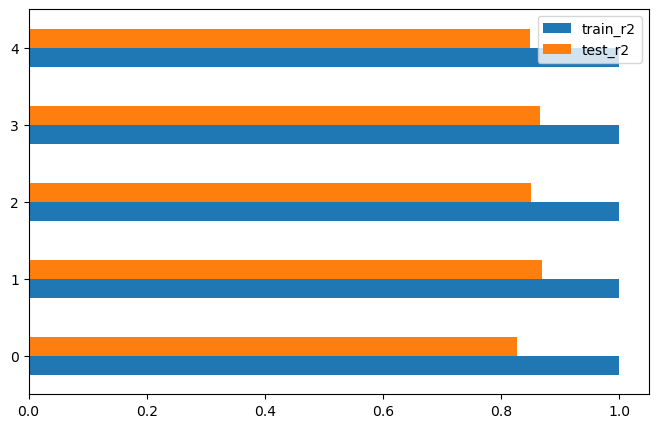

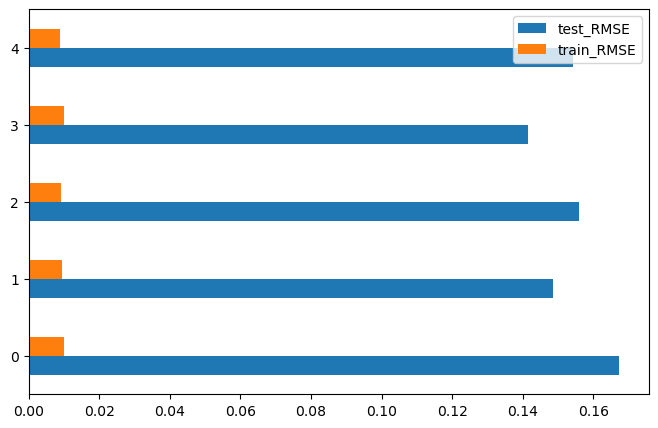

In [168]:
cv_result_ada[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [172]:
#model_features1 = get_input_features(model_pipeline=reg_XG, cat_step_name="cat")
model_features2 = get_input_features(model_pipeline=reg_Ada, cat_step_name ="cat")
#print(model_features2)
df_feature_importance = pd.DataFrame(reg_Ada.named_steps["regressor"].feature_importances_, columns=["coef"], index=model_features2)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

ValueError: Shape of passed values is (271, 1), indices imply (292, 1)

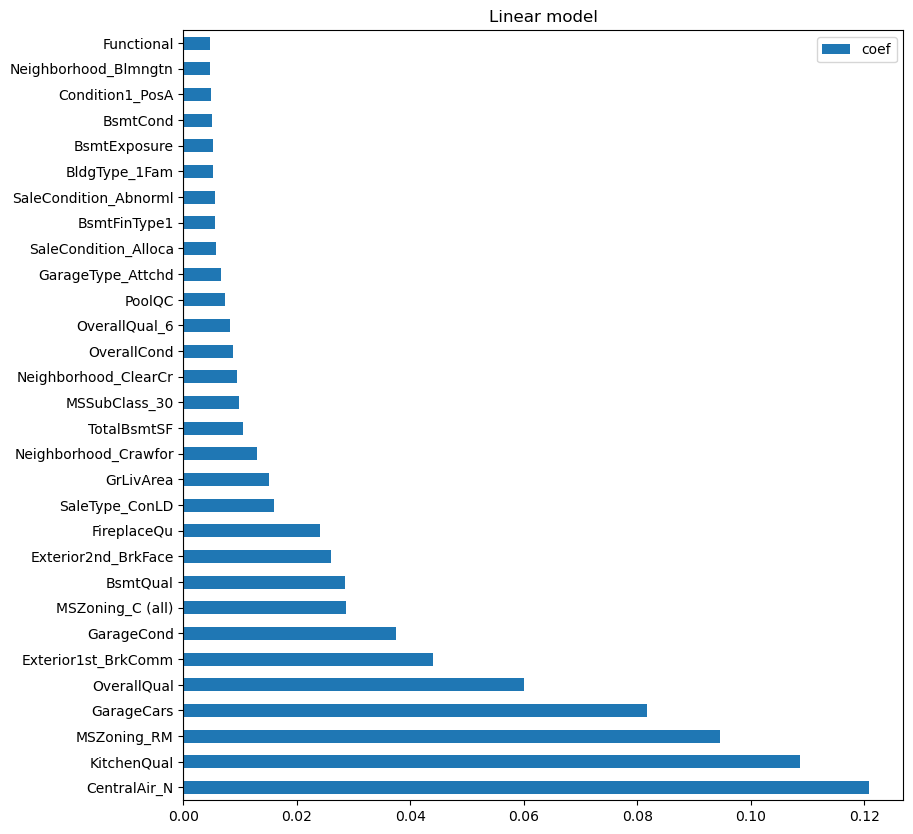

In [170]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [408]:
R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "Adaboost reg",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

                Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2      Randon Forest2      0.87  0.02  0.141421  0.149249  0.81
3  Randon Forest perf      0.78  0.03  0.173205  0.180571  0.89
4            XGBOOST1      0.87  0.02  0.141421  0.143228  0.82
5        XGBOOST perf      0.67  0.05  0.223607  0.209873  0.88
6        Adaboost reg      0.87  0.02  0.141421  0.152556  0.71


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\976678748.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


## SGD regressor

In [175]:
from sklearn.linear_model import SGDRegressor

In [409]:
reg_sgd=Pipeline(
    steps=[("preprocessor", preprocessor),  ("regressor", SGDRegressor(eta0=0.009))])

In [410]:
categorical_features = X2_train.select_dtypes(include="category").columns
reg_sgd.fit(X2_train, y2_train)
print(f"Model score - training data: {reg_sgd.score(X2_train, y2_train)}")
print(f"Model score - test data: {reg_sgd.score(X2_test, y2_test)}")

Model score - training data: 0.6649838116541689
Model score - test data: 0.5723018601721225


In [411]:
## model evalu
y_test_pred2 =reg_sgd.predict(X2_test)
y_train_pred2 = reg_sgd.predict(X2_train)

score=get_all_performances(value_train=(y2_train, y_train_pred2),
                     values_test=(y2_test, y_test_pred2),
                     metrics=METRICS
                    )
score

metric     train      test
0                        r2_score  0.664984  0.572302
1              mean_squared_error  0.053758  0.066403
2  mean_absolute_percentage_error  0.013878  0.014752
3                       max_error  1.691549  1.394264

In [412]:
## cross validation# cross validation only
cv_results = cross_validate(reg_sgd,
                            X2_train, y2_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_sgd= pd.DataFrame(cv_results)
cv_result_sgd

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.097943    0.041978  0.437746  0.652245                    -0.091024   
1  0.137921    0.040979  0.528231  0.654199                    -0.079717   
2  0.127929    0.034981  0.348459  0.630995                    -0.105607   
3  0.130925    0.047971  0.540905  0.656161                    -0.068702   
4  0.083949    0.029986  0.389094  0.630297                    -0.096344   

   train_neg_mean_squared_error  test_neg_mean_absolute_percentage_error  \
0                     -0.055673                                -0.017173   
1                     -0.054619                                -0.016392   
2                     -0.059062                                -0.019261   
3                     -0.056027                                -0.016431   
4                     -0.059577                                -0.017668   

   train_neg_mean_absolute_percentage_error  test_neg_mean_absolute_error  \
0                                 -0.014468                     -0.205332   
1                                 -0.014124                     -0.196417   
2                                 -0.014302                     -0.229726   
3                                 -0.014660                     -0.197765   
4                                 -0.015058                     -0.211768   

   train_neg_mean_absolute_error  
0                      -0.173413  
1                      -0.169394  
2                      -0.171604  
3                      -0.175452  
4                      -0.180302

In [413]:
col=["test_neg_mean_squared_error","train_neg_mean_squared_error"]
RMSE=np.sqrt(-cv_result_sgd[col]) 
RMSE.columns=['test_RMSE','train_RMSE']
RMSE

test_RMSE  train_RMSE
0   0.301703    0.235951
1   0.282343    0.233707
2   0.324972    0.243026
3   0.262110    0.236700
4   0.310393    0.244084

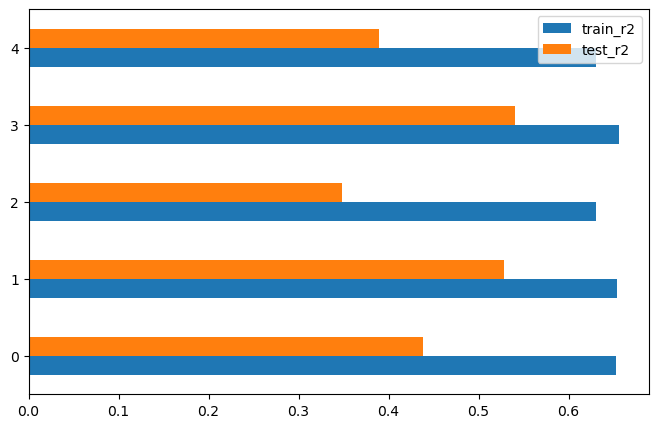

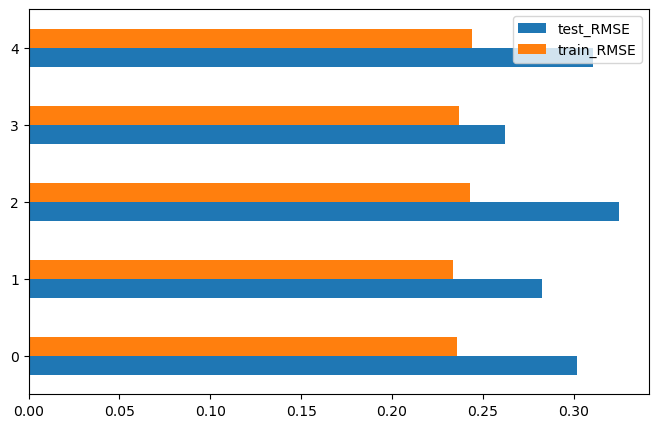

In [414]:
cv_result_sgd[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

RMSE[['test_RMSE','train_RMSE']].plot(kind="barh", figsize=(8, 5));

In [415]:
#model_features1 = get_input_features(model_pipeline=reg_XG, cat_step_name="cat")
model_features2 = get_input_features(model_pipeline=reg_sgd, cat_step_name ="cat")
#print(model_features2)
df_feature_importance = pd.DataFrame(reg_sgd.named_steps["regressor"].feature_importances_, columns=["coef"], index=model_features2)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

AttributeError: 'SGDRegressor' object has no attribute 'feature_importances_'

In [ ]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [416]:
R2=score.iloc[0]['test'].round(2)
mse=score.iloc[1]['test'].round(2)
rmse= np.sqrt(mse)
mae= score.iloc[3]['test'].round(2)
rmse_cv= np.mean(RMSE['test_RMSE'])

new_row = {"Model": "SGD regressor",  "R2_Score": R2,"MSE": mse, "RMSE": rmse , "RMSE_CV": rmse_cv,"MAE": mae}
models_score = models_score.append(new_row, ignore_index=True)
#models_score = pd.concat([models_score, new_row], ignore_index=True)
print(models_score)

                Model  R2_Score   MSE      RMSE   RMSE_CV   MAE
0      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
1      Randon Forest1      0.87  0.02  0.141421  0.149412  0.79
2      Randon Forest2      0.87  0.02  0.141421  0.149249  0.81
3  Randon Forest perf      0.78  0.03  0.173205  0.180571  0.89
4            XGBOOST1      0.87  0.02  0.141421  0.143228  0.82
5        XGBOOST perf      0.67  0.05  0.223607  0.209873  0.88
6        Adaboost reg      0.87  0.02  0.141421  0.152556  0.71
7       SGD regressor      0.57  0.07  0.264575  0.296304  1.39


C:\Users\USER\AppData\Local\Temp\ipykernel_20952\2227997873.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_score = models_score.append(new_row, ignore_index=True)


### hghj